# Project: Analyze Iowa Liquor Retail Sales
# Chiranjeevi D

Overview:

The dataset is designed to capture a detailed picture of liquor sales of Iowa across various cities, focusing on key metrics such as sales volume, sales in dollars, and specific product information through vendor names and item descriptions. It enables a robust analysis of sales performance, providing a means to track and predict trends across different regions and product types.

This dataset includes crucial columns like 'vendor_name', 'item_description', 'bottles_sold', 'sale_dollars', and 'volume_sold_liters'. These columns are instrumental for deep-diving into sales analytics, allowing for evaluations of product performance, regional sales trends, and inventory needs.

The comprehensive nature of this dataset supports sophisticated queries essential for business analytics, such as identifying top-selling products, forecasting regional demand, and managing inventory levels based on historical sales data. The granularity offered by the dataset also supports targeted marketing campaigns and strategic decision-making by providing insights into consumer preferences and product popularity across diverse markets.

In [1]:
# import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm
from scipy.stats import linregress
from IPython.display import display

In [2]:
# Imoport the dataset
df = pd.read_csv('iowa_liquor_sales_dataset.csv')

In [3]:
# Display the rows and columns of the dataset
df

,Unnamed: 0,date,store_number,store_name,city,zip_code,county_number,county,category,category_name,...,item_number,item_description,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,0,2020-11-19,2675,HY-VEE #2 / CORALVILLE,CORALVILLE,52241.0,52.0,JOHNSON,1031100.0,AMERICAN VODKAS,...,36308,HAWKEYE VODKA,6,7.17,1750,10.76,54,581.04,94.50,24.96
1,1,2019-06-04,2513,HY-VEE FOOD STORE #2 / IOWA CITY,IOWA CITY,52240.0,52.0,JOHNSON,1031100.0,AMERICAN VODKAS,...,38178,TITOS HANDMADE VODKA,6,19.00,1750,28.50,108,3078.00,189.00,49.92
2,2,2018-04-03,5437,GREAT PASTIMES,MONTICELLO,52310.0,53.0,JONES,1062200.0,WHITE RUM,...,43127,BACARDI SUPERIOR RUM,12,9.50,1000,14.25,2,28.50,2.00,0.53
3,3,2018-04-24,2572,HY-VEE FOOD STORE / CEDAR FALLS,CEDAR FALLS,50613.0,7.0,BLACK HAWK,1062400.0,SPICED RUM,...,43331,CAPTAIN MORGAN SPICED RUM MINI,12,4.80,500,7.20,4,28.80,2.00,0.53
4,4,2018-07-09,2579,HY-VEE FOOD STORE / GRINNELL,GRINNELL,50112.0,79.0,POWESHIEK,1081400.0,AMERICAN SCHNAPPS,...,82637,DEKUYPER GRAPE PUCKER,12,7.87,1000,11.81,2,23.62,2.00,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12061220,12061220,2018-07-19,5425,SPIRITS LIQUOR,GRIMES,50111.0,77.0,POLK,1012100.0,CANADIAN WHISKIES,...,10805,CROWN ROYAL REGAL APPLE,24,8.00,375,12.00,3,36.00,1.12,0.30
12061221,12061221,2018-05-24,4603,KUM & GO #208 / SE 14TH DM,DES MOINES,50320.0,77.0,POLK,1011200.0,STRAIGHT BOURBON WHISKIES,...,19064,JIM BEAM,24,5.50,375,8.25,3,24.75,1.12,0.30
12061222,12061222,2018-02-06,2513,HY-VEE FOOD STORE #2 / IOWA CITY,IOWA CITY,52240.0,52.0,JOHNSON,1011200.0,STRAIGHT BOURBON WHISKIES,...,19475,MAKER'S MARK REPLICA,12,8.99,375,13.49,3,40.47,1.12,0.30
12061223,12061223,2018-04-23,3778,FAMILY PANTRY,DES MOINES,50310.0,77.0,POLK,1082000.0,IMPORTED CORDIALS & LIQUEURS,...,47863,D'USSE VSOP,12,16.34,375,24.51,3,73.53,1.12,0.30


In [4]:
# It shows the shape of the dataset like rows and columns
df.shape

(12061225, 22)

In [5]:
# Describe the data
df.describe()

,Unnamed: 0,store_number,zip_code,county_number,category,vendor_number,item_number,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,1.206122e+07,1.206122e+07,1.205262e+07,1.128371e+07,1.205560e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07
mean,6.030612e+06,4.027121e+03,5.125539e+04,5.728518e+01,1.054054e+06,2.773992e+02,5.150542e+04,1.217049e+01,1.092614e+01,8.517209e+02,1.639109e+01,1.146433e+01,1.539101e+02,9.327977e+00,2.459285e+00
std,3.481776e+06,1.227670e+03,9.908023e+02,2.728183e+01,9.824572e+04,1.424077e+02,8.042214e+04,7.986909e+00,1.063654e+01,5.245996e+02,1.595444e+01,3.326218e+01,5.415800e+02,3.940586e+01,1.041011e+01
min,0.000000e+00,2.106000e+03,5.000200e+04,1.000000e+00,1.011000e+06,1.000000e+01,1.590000e+02,1.000000e+00,3.300000e-01,2.000000e+01,5.000000e-01,-2.400000e+02,-3.375000e+03,-1.560000e+02,-4.121000e+01
25%,3.015306e+06,2.633000e+03,5.031500e+04,3.100000e+01,1.012200e+06,2.050000e+02,2.706600e+04,6.000000e+00,5.750000e+00,6.000000e+02,8.630000e+00,3.000000e+00,3.753000e+01,1.500000e+00,3.900000e-01
50%,6.030612e+06,4.102000e+03,5.105500e+04,6.300000e+01,1.031200e+06,2.600000e+02,3.942000e+04,1.200000e+01,8.740000e+00,7.500000e+02,1.311000e+01,6.000000e+00,8.100000e+01,4.800000e+00,1.260000e+00
75%,9.045918e+06,5.104000e+03,5.230200e+04,7.700000e+01,1.062500e+06,3.950000e+02,6.487000e+04,1.200000e+01,1.350000e+01,1.000000e+03,2.025000e+01,1.200000e+01,1.612800e+02,1.050000e+01,2.770000e+00
max,1.206122e+07,1.008100e+04,8.090400e+04,9.900000e+01,1.901200e+06,9.780000e+02,9.999950e+05,1.200000e+02,2.298840e+03,6.000000e+03,3.448260e+03,1.320000e+04,2.795573e+05,1.320000e+04,3.487070e+03


In [6]:
# It provides the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12061225 entries, 0 to 12061224
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   date                 object 
 2   store_number         int64  
 3   store_name           object 
 4   city                 object 
 5   zip_code             float64
 6   county_number        float64
 7   county               object 
 8   category             float64
 9   category_name        object 
 10  vendor_number        float64
 11  vendor_name          object 
 12  item_number          int64  
 13  item_description     object 
 14  pack                 int64  
 15  state_bottle_cost    float64
 16  bottle_volume_ml     int64  
 17  state_bottle_retail  float64
 18  bottles_sold         int64  
 19  sale_dollars         float64
 20  volume_sold_liters   float64
 21  volume_sold_gallons  float64
dtypes: float64(9), int64(6), object(7)
memory usage: 2.0+ GB


In [7]:
# It provides the first 5 rows data
df.head()

,Unnamed: 0,date,store_number,store_name,city,zip_code,county_number,county,category,category_name,...,item_number,item_description,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,0,2020-11-19,2675,HY-VEE #2 / CORALVILLE,CORALVILLE,52241.0,52.0,JOHNSON,1031100.0,AMERICAN VODKAS,...,36308,HAWKEYE VODKA,6,7.17,1750,10.76,54,581.04,94.5,24.96
1,1,2019-06-04,2513,HY-VEE FOOD STORE #2 / IOWA CITY,IOWA CITY,52240.0,52.0,JOHNSON,1031100.0,AMERICAN VODKAS,...,38178,TITOS HANDMADE VODKA,6,19.00,1750,28.50,108,3078.00,189.0,49.92
2,2,2018-04-03,5437,GREAT PASTIMES,MONTICELLO,52310.0,53.0,JONES,1062200.0,WHITE RUM,...,43127,BACARDI SUPERIOR RUM,12,9.50,1000,14.25,2,28.50,2.0,0.53
3,3,2018-04-24,2572,HY-VEE FOOD STORE / CEDAR FALLS,CEDAR FALLS,50613.0,7.0,BLACK HAWK,1062400.0,SPICED RUM,...,43331,CAPTAIN MORGAN SPICED RUM MINI,12,4.80,500,7.20,4,28.80,2.0,0.53
4,4,2018-07-09,2579,HY-VEE FOOD STORE / GRINNELL,GRINNELL,50112.0,79.0,POWESHIEK,1081400.0,AMERICAN SCHNAPPS,...,82637,DEKUYPER GRAPE PUCKER,12,7.87,1000,11.81,2,23.62,2.0,0.53


In [8]:
# It provides the last 5 rows of the data
df.tail()

,Unnamed: 0,date,store_number,store_name,city,zip_code,county_number,county,category,category_name,...,item_number,item_description,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
12061220,12061220,2018-07-19,5425,SPIRITS LIQUOR,GRIMES,50111.0,77.0,POLK,1012100.0,CANADIAN WHISKIES,...,10805,CROWN ROYAL REGAL APPLE,24,8.00,375,12.00,3,36.00,1.12,0.3
12061221,12061221,2018-05-24,4603,KUM & GO #208 / SE 14TH DM,DES MOINES,50320.0,77.0,POLK,1011200.0,STRAIGHT BOURBON WHISKIES,...,19064,JIM BEAM,24,5.50,375,8.25,3,24.75,1.12,0.3
12061222,12061222,2018-02-06,2513,HY-VEE FOOD STORE #2 / IOWA CITY,IOWA CITY,52240.0,52.0,JOHNSON,1011200.0,STRAIGHT BOURBON WHISKIES,...,19475,MAKER'S MARK REPLICA,12,8.99,375,13.49,3,40.47,1.12,0.3
12061223,12061223,2018-04-23,3778,FAMILY PANTRY,DES MOINES,50310.0,77.0,POLK,1082000.0,IMPORTED CORDIALS & LIQUEURS,...,47863,D'USSE VSOP,12,16.34,375,24.51,3,73.53,1.12,0.3
12061224,12061224,2018-04-25,2566,HY-VEE FOOD STORE / KNOXVILLE,KNOXVILLE,50138.0,63.0,MARION,1022100.0,MIXTO TEQUILA,...,89194,JOSE CUERVO ESPECIAL REPOSADO FLASK,24,5.50,375,8.25,3,24.75,1.12,0.3


In [9]:
# List of categorical variables based on data type
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
print("Categorical variables based on data type:", categorical_vars)

Categorical variables based on data type: Index(['date', 'store_name', 'city', 'county', 'category_name', 'vendor_name',
       'item_description'],
      dtype='object')


In [10]:
# List of quantitative variables based on data type
quantitative_vars = df.select_dtypes(include=['int64', 'float64']).columns
print("Quantitative variables:", quantitative_vars)

Quantitative variables: Index(['Unnamed: 0', 'store_number', 'zip_code', 'county_number', 'category',
       'vendor_number', 'item_number', 'pack', 'state_bottle_cost',
       'bottle_volume_ml', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')


In the below analyzing sales data, because of the huge dataset, I had to drop certain columns like 'zip_code', 'county_number', 'category', and 'vendor_number' might be considered unnecessary for several reasons: Zip Code and County Number might be too granular for analyses aiming to capture broader market trends or regional sales performance, making them irrelevant for wider trend analysis and adding unnecessary complexity. Removing these details simplifies the dataset, allowing for a focus on more impactful variable city which influences broader sales outcomes. Category can be redundant if 'item_description' already provides detailed product information, rendering explicit category labels superfluous. Additionally, overly broad categories may not effectively differentiate products in a way that impacts sales analysis or decision-making. Vendor Number, typically used for internal tracking, offers limited insight unless linked with detailed vendor performance data. In cases where vendor performance isn't analyzed or vendor names are used instead, numeric IDs provide little analytical utility. Excluding these columns streamlines the analysis, reduces computational load, and enhances the clarity of the findings, leading to more actionable insights.

Note: These columns are not relevant to my individual inventory management project presentation within the group as well.

In [11]:
# Dropped the columns which are not much affected and assigned to the another dataframe
columns_to_drop = ['zip_code', 'county_number', 'category', 'vendor_number']
df_liquor = df.drop(columns=columns_to_drop, errors='ignore')

# Print the columns to check that the columns have been dropped
print(df_liquor.columns)

Index(['Unnamed: 0', 'date', 'store_number', 'store_name', 'city', 'county',
       'category_name', 'vendor_name', 'item_number', 'item_description',
       'pack', 'state_bottle_cost', 'bottle_volume_ml', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')


In [12]:
# It shows the data after removing unnecessary columns.
df_liquor

,Unnamed: 0,date,store_number,store_name,city,county,category_name,vendor_name,item_number,item_description,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,0,2020-11-19,2675,HY-VEE #2 / CORALVILLE,CORALVILLE,JOHNSON,AMERICAN VODKAS,LUXCO INC,36308,HAWKEYE VODKA,6,7.17,1750,10.76,54,581.04,94.50,24.96
1,1,2019-06-04,2513,HY-VEE FOOD STORE #2 / IOWA CITY,IOWA CITY,JOHNSON,AMERICAN VODKAS,FIFTH GENERATION INC,38178,TITOS HANDMADE VODKA,6,19.00,1750,28.50,108,3078.00,189.00,49.92
2,2,2018-04-03,5437,GREAT PASTIMES,MONTICELLO,JONES,WHITE RUM,BACARDI USA INC,43127,BACARDI SUPERIOR RUM,12,9.50,1000,14.25,2,28.50,2.00,0.53
3,3,2018-04-24,2572,HY-VEE FOOD STORE / CEDAR FALLS,CEDAR FALLS,BLACK HAWK,SPICED RUM,DIAGEO AMERICAS,43331,CAPTAIN MORGAN SPICED RUM MINI,12,4.80,500,7.20,4,28.80,2.00,0.53
4,4,2018-07-09,2579,HY-VEE FOOD STORE / GRINNELL,GRINNELL,POWESHIEK,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82637,DEKUYPER GRAPE PUCKER,12,7.87,1000,11.81,2,23.62,2.00,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12061220,12061220,2018-07-19,5425,SPIRITS LIQUOR,GRIMES,POLK,CANADIAN WHISKIES,DIAGEO AMERICAS,10805,CROWN ROYAL REGAL APPLE,24,8.00,375,12.00,3,36.00,1.12,0.30
12061221,12061221,2018-05-24,4603,KUM & GO #208 / SE 14TH DM,DES MOINES,POLK,STRAIGHT BOURBON WHISKIES,JIM BEAM BRANDS,19064,JIM BEAM,24,5.50,375,8.25,3,24.75,1.12,0.30
12061222,12061222,2018-02-06,2513,HY-VEE FOOD STORE #2 / IOWA CITY,IOWA CITY,JOHNSON,STRAIGHT BOURBON WHISKIES,JIM BEAM BRANDS,19475,MAKER'S MARK REPLICA,12,8.99,375,13.49,3,40.47,1.12,0.30
12061223,12061223,2018-04-23,3778,FAMILY PANTRY,DES MOINES,POLK,IMPORTED CORDIALS & LIQUEURS,BACARDI USA INC,47863,D'USSE VSOP,12,16.34,375,24.51,3,73.53,1.12,0.30


In [13]:
# Describe the data
df_liquor.describe()

,Unnamed: 0,store_number,item_number,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07,1.206122e+07
mean,6.030612e+06,4.027121e+03,5.150542e+04,1.217049e+01,1.092614e+01,8.517209e+02,1.639109e+01,1.146433e+01,1.539101e+02,9.327977e+00,2.459285e+00
std,3.481776e+06,1.227670e+03,8.042214e+04,7.986909e+00,1.063654e+01,5.245996e+02,1.595444e+01,3.326218e+01,5.415800e+02,3.940586e+01,1.041011e+01
min,0.000000e+00,2.106000e+03,1.590000e+02,1.000000e+00,3.300000e-01,2.000000e+01,5.000000e-01,-2.400000e+02,-3.375000e+03,-1.560000e+02,-4.121000e+01
25%,3.015306e+06,2.633000e+03,2.706600e+04,6.000000e+00,5.750000e+00,6.000000e+02,8.630000e+00,3.000000e+00,3.753000e+01,1.500000e+00,3.900000e-01
50%,6.030612e+06,4.102000e+03,3.942000e+04,1.200000e+01,8.740000e+00,7.500000e+02,1.311000e+01,6.000000e+00,8.100000e+01,4.800000e+00,1.260000e+00
75%,9.045918e+06,5.104000e+03,6.487000e+04,1.200000e+01,1.350000e+01,1.000000e+03,2.025000e+01,1.200000e+01,1.612800e+02,1.050000e+01,2.770000e+00
max,1.206122e+07,1.008100e+04,9.999950e+05,1.200000e+02,2.298840e+03,6.000000e+03,3.448260e+03,1.320000e+04,2.795573e+05,1.320000e+04,3.487070e+03


In [14]:
# Data information
df_liquor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12061225 entries, 0 to 12061224
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   date                 object 
 2   store_number         int64  
 3   store_name           object 
 4   city                 object 
 5   county               object 
 6   category_name        object 
 7   vendor_name          object 
 8   item_number          int64  
 9   item_description     object 
 10  pack                 int64  
 11  state_bottle_cost    float64
 12  bottle_volume_ml     int64  
 13  state_bottle_retail  float64
 14  bottles_sold         int64  
 15  sale_dollars         float64
 16  volume_sold_liters   float64
 17  volume_sold_gallons  float64
dtypes: float64(5), int64(6), object(7)
memory usage: 1.6+ GB


In [15]:
# It provides the top 5 rows
df_liquor.head()

,Unnamed: 0,date,store_number,store_name,city,county,category_name,vendor_name,item_number,item_description,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,0,2020-11-19,2675,HY-VEE #2 / CORALVILLE,CORALVILLE,JOHNSON,AMERICAN VODKAS,LUXCO INC,36308,HAWKEYE VODKA,6,7.17,1750,10.76,54,581.04,94.5,24.96
1,1,2019-06-04,2513,HY-VEE FOOD STORE #2 / IOWA CITY,IOWA CITY,JOHNSON,AMERICAN VODKAS,FIFTH GENERATION INC,38178,TITOS HANDMADE VODKA,6,19.00,1750,28.50,108,3078.00,189.0,49.92
2,2,2018-04-03,5437,GREAT PASTIMES,MONTICELLO,JONES,WHITE RUM,BACARDI USA INC,43127,BACARDI SUPERIOR RUM,12,9.50,1000,14.25,2,28.50,2.0,0.53
3,3,2018-04-24,2572,HY-VEE FOOD STORE / CEDAR FALLS,CEDAR FALLS,BLACK HAWK,SPICED RUM,DIAGEO AMERICAS,43331,CAPTAIN MORGAN SPICED RUM MINI,12,4.80,500,7.20,4,28.80,2.0,0.53
4,4,2018-07-09,2579,HY-VEE FOOD STORE / GRINNELL,GRINNELL,POWESHIEK,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82637,DEKUYPER GRAPE PUCKER,12,7.87,1000,11.81,2,23.62,2.0,0.53


In [16]:
# List of categorical variables after dropping.
categorical_vars = df_liquor.select_dtypes(include=['object', 'category']).columns
print("Categorical variables based on data type:", categorical_vars)

Categorical variables based on data type: Index(['date', 'store_name', 'city', 'county', 'category_name', 'vendor_name',
       'item_description'],
      dtype='object')


In [17]:
# List quantitative variables after dropping
quantitative_vars = df_liquor.select_dtypes(include=['int64', 'float64']).columns
print("Quantitative variables:", quantitative_vars)

Quantitative variables: Index(['Unnamed: 0', 'store_number', 'item_number', 'pack',
       'state_bottle_cost', 'bottle_volume_ml', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')


## Data Cleansing

In [18]:
# Check the total missing values in the data
total_missing = df_liquor.isnull().sum().sum()
print("Total missing values in the dataset:", total_missing)

Total missing values in the dataset: 22784


In [19]:
# Check the missing values per column
df_liquor.isnull().sum()

Unnamed: 0                0
date                      0
store_number              0
store_name                0
city                   8578
county                 8578
category_name          5621
vendor_name               7
item_number               0
item_description          0
pack                      0
state_bottle_cost         0
bottle_volume_ml          0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
dtype: int64

In [20]:
# Calculate the percentage of missing values to four decimal places
percentage_missing = (df_liquor.isnull().sum() / len(df_liquor)) * 100
percentage_missing_rounded = percentage_missing.round(4)

# Print the formatted percentages
print("Percentage of missing values per column:\n", percentage_missing_rounded)

Percentage of missing values per column:
 Unnamed: 0             0.0000
date                   0.0000
store_number           0.0000
store_name             0.0000
city                   0.0711
county                 0.0711
category_name          0.0466
vendor_name            0.0001
item_number            0.0000
item_description       0.0000
pack                   0.0000
state_bottle_cost      0.0000
bottle_volume_ml       0.0000
state_bottle_retail    0.0000
bottles_sold           0.0000
sale_dollars           0.0000
volume_sold_liters     0.0000
volume_sold_gallons    0.0000
dtype: float64


In [21]:
# It provides the missing value columns names
columns_with_missing_values = df_liquor.columns[df_liquor.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: ['city', 'county', 'category_name', 'vendor_name']


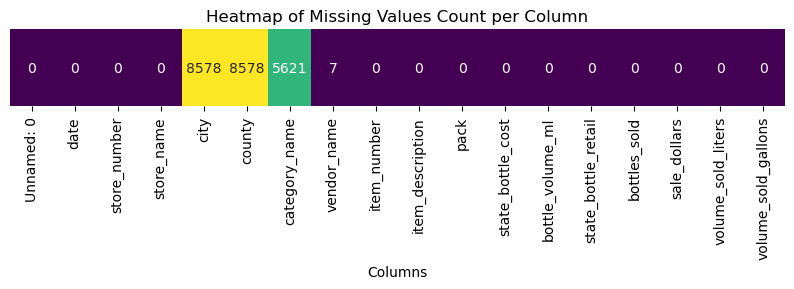

In [22]:
# It creates a boolean DataFrame where True indicates a missing value.
missing_values = df_liquor.isnull()

# Length of this bar will be the number of columns.
missing_values_heatmap = missing_values.sum(axis=0).to_frame().T

# It creates a heatmap for these summed missing values.
plt.figure(figsize=(10, 1))
sns.heatmap(missing_values_heatmap, annot=True, fmt="d", cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values Count per Column')
plt.xlabel('Columns')
plt.yticks([])

# Plot Show
plt.show()

To provide a clear visualization, the heatmap above displays the missing values in the dataset.

In [23]:
# It drops rows where any of the specified columns have missing values and assigned to the final dataframe.
df_final_liquor = df_liquor.dropna(subset=['city', 'county', 'category_name', 'vendor_name'])

In [24]:
# it provides the final dataframe of rows and columns
df_final_liquor

,Unnamed: 0,date,store_number,store_name,city,county,category_name,vendor_name,item_number,item_description,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,0,2020-11-19,2675,HY-VEE #2 / CORALVILLE,CORALVILLE,JOHNSON,AMERICAN VODKAS,LUXCO INC,36308,HAWKEYE VODKA,6,7.17,1750,10.76,54,581.04,94.50,24.96
1,1,2019-06-04,2513,HY-VEE FOOD STORE #2 / IOWA CITY,IOWA CITY,JOHNSON,AMERICAN VODKAS,FIFTH GENERATION INC,38178,TITOS HANDMADE VODKA,6,19.00,1750,28.50,108,3078.00,189.00,49.92
2,2,2018-04-03,5437,GREAT PASTIMES,MONTICELLO,JONES,WHITE RUM,BACARDI USA INC,43127,BACARDI SUPERIOR RUM,12,9.50,1000,14.25,2,28.50,2.00,0.53
3,3,2018-04-24,2572,HY-VEE FOOD STORE / CEDAR FALLS,CEDAR FALLS,BLACK HAWK,SPICED RUM,DIAGEO AMERICAS,43331,CAPTAIN MORGAN SPICED RUM MINI,12,4.80,500,7.20,4,28.80,2.00,0.53
4,4,2018-07-09,2579,HY-VEE FOOD STORE / GRINNELL,GRINNELL,POWESHIEK,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82637,DEKUYPER GRAPE PUCKER,12,7.87,1000,11.81,2,23.62,2.00,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12061220,12061220,2018-07-19,5425,SPIRITS LIQUOR,GRIMES,POLK,CANADIAN WHISKIES,DIAGEO AMERICAS,10805,CROWN ROYAL REGAL APPLE,24,8.00,375,12.00,3,36.00,1.12,0.30
12061221,12061221,2018-05-24,4603,KUM & GO #208 / SE 14TH DM,DES MOINES,POLK,STRAIGHT BOURBON WHISKIES,JIM BEAM BRANDS,19064,JIM BEAM,24,5.50,375,8.25,3,24.75,1.12,0.30
12061222,12061222,2018-02-06,2513,HY-VEE FOOD STORE #2 / IOWA CITY,IOWA CITY,JOHNSON,STRAIGHT BOURBON WHISKIES,JIM BEAM BRANDS,19475,MAKER'S MARK REPLICA,12,8.99,375,13.49,3,40.47,1.12,0.30
12061223,12061223,2018-04-23,3778,FAMILY PANTRY,DES MOINES,POLK,IMPORTED CORDIALS & LIQUEURS,BACARDI USA INC,47863,D'USSE VSOP,12,16.34,375,24.51,3,73.53,1.12,0.30


In [25]:
# Describe the data
df_final_liquor.describe()

,Unnamed: 0,store_number,item_number,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,1.204703e+07,1.204703e+07,1.204703e+07,1.204703e+07,1.204703e+07,1.204703e+07,1.204703e+07,1.204703e+07,1.204703e+07,1.204703e+07,1.204703e+07
mean,6.030925e+06,4.026910e+03,5.141613e+04,1.217187e+01,1.092491e+01,8.517206e+02,1.638925e+01,1.146509e+01,1.538825e+02,9.328136e+00,2.459327e+00
std,3.481678e+06,1.226557e+03,7.998584e+04,7.988585e+00,1.063389e+01,5.245963e+02,1.595046e+01,3.326386e+01,5.414301e+02,3.940818e+01,1.041072e+01
min,0.000000e+00,2.106000e+03,1.590000e+02,1.000000e+00,3.300000e-01,2.000000e+01,5.000000e-01,-2.400000e+02,-3.375000e+03,-1.560000e+02,-4.121000e+01
25%,3.015554e+06,2.633000e+03,2.706600e+04,6.000000e+00,5.750000e+00,6.000000e+02,8.630000e+00,3.000000e+00,3.753000e+01,1.500000e+00,3.900000e-01
50%,6.031332e+06,4.102000e+03,3.941900e+04,1.200000e+01,8.740000e+00,7.500000e+02,1.311000e+01,6.000000e+00,8.100000e+01,4.800000e+00,1.260000e+00
75%,9.045938e+06,5.106000e+03,6.487000e+04,1.200000e+01,1.350000e+01,1.000000e+03,2.025000e+01,1.200000e+01,1.612800e+02,1.050000e+01,2.770000e+00
max,1.206122e+07,1.008100e+04,9.999950e+05,1.200000e+02,2.298840e+03,6.000000e+03,3.448260e+03,1.320000e+04,2.795573e+05,1.320000e+04,3.487070e+03


In [26]:
# It provides the data info
df_final_liquor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12047030 entries, 0 to 12061224
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   date                 object 
 2   store_number         int64  
 3   store_name           object 
 4   city                 object 
 5   county               object 
 6   category_name        object 
 7   vendor_name          object 
 8   item_number          int64  
 9   item_description     object 
 10  pack                 int64  
 11  state_bottle_cost    float64
 12  bottle_volume_ml     int64  
 13  state_bottle_retail  float64
 14  bottles_sold         int64  
 15  sale_dollars         float64
 16  volume_sold_liters   float64
 17  volume_sold_gallons  float64
dtypes: float64(5), int64(6), object(7)
memory usage: 1.7+ GB


In [27]:
# It provides the final dataframe first 5 rows
df_final_liquor.head()

,Unnamed: 0,date,store_number,store_name,city,county,category_name,vendor_name,item_number,item_description,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,0,2020-11-19,2675,HY-VEE #2 / CORALVILLE,CORALVILLE,JOHNSON,AMERICAN VODKAS,LUXCO INC,36308,HAWKEYE VODKA,6,7.17,1750,10.76,54,581.04,94.5,24.96
1,1,2019-06-04,2513,HY-VEE FOOD STORE #2 / IOWA CITY,IOWA CITY,JOHNSON,AMERICAN VODKAS,FIFTH GENERATION INC,38178,TITOS HANDMADE VODKA,6,19.00,1750,28.50,108,3078.00,189.0,49.92
2,2,2018-04-03,5437,GREAT PASTIMES,MONTICELLO,JONES,WHITE RUM,BACARDI USA INC,43127,BACARDI SUPERIOR RUM,12,9.50,1000,14.25,2,28.50,2.0,0.53
3,3,2018-04-24,2572,HY-VEE FOOD STORE / CEDAR FALLS,CEDAR FALLS,BLACK HAWK,SPICED RUM,DIAGEO AMERICAS,43331,CAPTAIN MORGAN SPICED RUM MINI,12,4.80,500,7.20,4,28.80,2.0,0.53
4,4,2018-07-09,2579,HY-VEE FOOD STORE / GRINNELL,GRINNELL,POWESHIEK,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82637,DEKUYPER GRAPE PUCKER,12,7.87,1000,11.81,2,23.62,2.0,0.53


In [28]:
# It provides the final dataframe last 5 rows
df_final_liquor.tail()

,Unnamed: 0,date,store_number,store_name,city,county,category_name,vendor_name,item_number,item_description,pack,state_bottle_cost,bottle_volume_ml,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
12061220,12061220,2018-07-19,5425,SPIRITS LIQUOR,GRIMES,POLK,CANADIAN WHISKIES,DIAGEO AMERICAS,10805,CROWN ROYAL REGAL APPLE,24,8.00,375,12.00,3,36.00,1.12,0.3
12061221,12061221,2018-05-24,4603,KUM & GO #208 / SE 14TH DM,DES MOINES,POLK,STRAIGHT BOURBON WHISKIES,JIM BEAM BRANDS,19064,JIM BEAM,24,5.50,375,8.25,3,24.75,1.12,0.3
12061222,12061222,2018-02-06,2513,HY-VEE FOOD STORE #2 / IOWA CITY,IOWA CITY,JOHNSON,STRAIGHT BOURBON WHISKIES,JIM BEAM BRANDS,19475,MAKER'S MARK REPLICA,12,8.99,375,13.49,3,40.47,1.12,0.3
12061223,12061223,2018-04-23,3778,FAMILY PANTRY,DES MOINES,POLK,IMPORTED CORDIALS & LIQUEURS,BACARDI USA INC,47863,D'USSE VSOP,12,16.34,375,24.51,3,73.53,1.12,0.3
12061224,12061224,2018-04-25,2566,HY-VEE FOOD STORE / KNOXVILLE,KNOXVILLE,MARION,MIXTO TEQUILA,PROXIMO,89194,JOSE CUERVO ESPECIAL REPOSADO FLASK,24,5.50,375,8.25,3,24.75,1.12,0.3


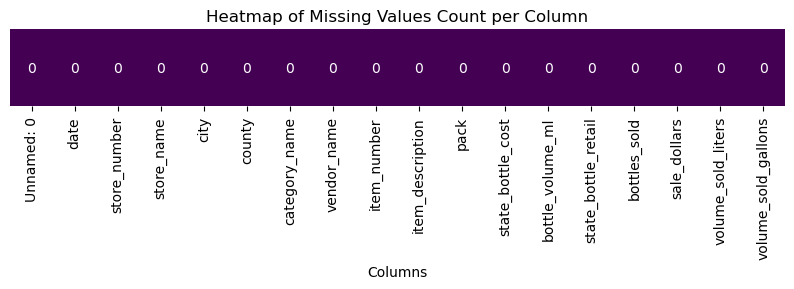

In [29]:
# It creates a boolean DataFrame where True indicates a missing value.
missing_values = df_final_liquor.isnull()

# Length of this bar will be the number of columns.
missing_values_heatmap = missing_values.sum(axis=0).to_frame().T

# It creates a heatmap for these summed missing values.
plt.figure(figsize=(10, 1))
sns.heatmap(missing_values_heatmap, annot=True, fmt="d", cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values Count per Column')
plt.xlabel('Columns')
plt.yticks([])

# Show the plot
plt.show()

To provide a clear visualization, the heatmap above displays the missing values in the dataset.

In [30]:
# Check for duplicates
duplicates = df_final_liquor.duplicated()
print("Number of duplicate entries:", duplicates.sum())

Number of duplicate entries: 0


In [31]:
# Date Conversion
df_final_liquor.loc[:, 'date'] = pd.to_datetime(df_final_liquor['date'], errors='coerce')

# Check the output to confirm the conversion
print(df_final_liquor['date'].head())

0    2020-11-19 00:00:00
1    2019-06-04 00:00:00
2    2018-04-03 00:00:00
3    2018-04-24 00:00:00
4    2018-07-09 00:00:00
Name: date, dtype: object


## Exploratory Data Analysis(EDA)

The below few lines code analysis is performed to compute descriptive statistics for the "bottles_sold" column from the df_final_liquor DataFrame. This column is critical as it directly quantifies product sales, making it a key metric for assessing the performance of the business. Here's a summary of the operations performed and their significance:

Mode: The mode is calculated to determine the most frequently sold quantity of bottles, which can indicate the most common sales size or package that customers prefer.

Mean: The mean provides an average number of bottles sold, offering insight into the overall sales volume and helping to understand the central tendency of the sales data.

Median: The median is used as it gives the middle value of the dataset, which is less sensitive to outliers than the mean. This is useful in skewed distributions to better represent typical sales.

Minimum and Maximum: Identifying the minimum and maximum values helps to understand the range of sales quantities, from the smallest to the largest single transaction recorded.

Range: The range is computed by subtracting the minimum value from the maximum value, which helps in understanding the spread or variability in the number of bottles sold across transactions.

Quartiles and Interquartile Range (IQR): Quartiles are computed to assess the distribution of sales further. The IQR, which is the range between the first and third quartiles, measures the middle 50% of the data, highlighting the spread of the central bulk of the data and helping identify outliers.

Standard Deviation: The standard deviation provides a measure of the amount of variation or dispersion in the number of bottles sold. A high standard deviation indicates that the sales figures vary widely from the mean sales figures, which could imply inconsistent sales patterns.

In [32]:
# calculate mode for a quantitative variable (‘Bottles sold ’) from data frame
mode = df_final_liquor['bottles_sold'].mode()
print("Mode of bottles sold:", mode[0])

# calculate mean for a quantitative variable (‘Bottles sold ’) from data frame
mean = df_final_liquor['bottles_sold'].mean()
print("Mean of bottles sold:", mean)

# calculate median for a quantitative variable (‘Bottles sold ’) from data frame
median = df_final_liquor['bottles_sold'].median()
print("Median of bottles sold:", median)

Mode of bottles sold: 12
Mean of bottles sold: 11.46508724557007
Median of bottles sold: 6.0


In [33]:
# calculate min for a quantitative variable (‘Bottles sold ’) from data frame range
min_ = df_final_liquor['bottles_sold'].min()
print("Min bottles sold:", min_)

# calculate max for a quantitative variable (‘Bottles sold ’) from data frame range
max_ = df_final_liquor['bottles_sold'].max()
print("Max bottles sold:", max_)

# calculate range for a quantitative variable (‘Bottles sold ’) from data frame range
range_ = max_ - min_
print("Bottles sold range:", range_)

Min bottles sold: -240
Max bottles sold: 13200
Bottles sold range: 13440


In [34]:
# Calculate quantiles, IQR, outliers for a quantitative variable (‘Bottles sold’) from data frame
Q25 = df_final_liquor['bottles_sold'].quantile(0.25)
print("Q25:", Q25)
Q75 = df_final_liquor['bottles_sold'].quantile(0.75)
print("Q75:", Q75)
IQR = Q75 - Q25
print("IQR:",IQR)

Q25: 3.0
Q75: 12.0
IQR: 9.0


In [35]:
# calculate standard deviation of a quantitative variable (‘bottles sold’) from data frame
bottles_sold_std = df_final_liquor['bottles_sold'].std()
print("std of bottles_sold:", bottles_sold_std)

std of bottles_sold: 33.263857935693515


<Axes: >

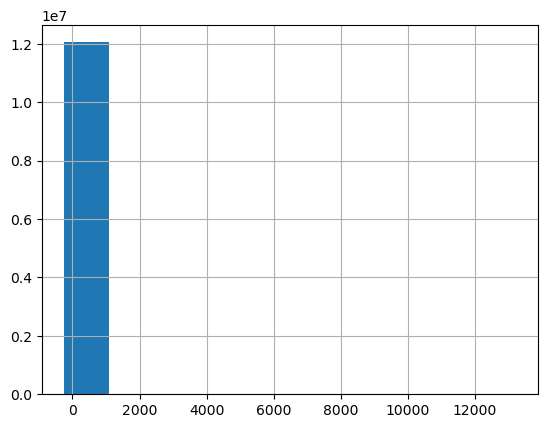

In [36]:
# plot a histogram for a quantitative variable (‘bottles sold’) from data frame with 10 equal bins
df_final_liquor['bottles_sold'].hist(bins=10)

Observation:- The histogram you provided illustrates the distribution of "bottles_sold" in your dataset, divided into 10 equal bins. Most of the data is concentrated heavily in the first bin, indicating that the vast majority of transactions involve selling fewer than 2,000 bottles. The frequency of transactions decreases sharply as the number of bottles sold increases, with very few transactions involving sales of 2,000 to 12,000 bottles. This distribution suggests that smaller transactions are far more common than larger ones, highlighting a sales pattern focused on smaller quantities per transaction.

Text(0, 0.5, 'Bottles Sold')

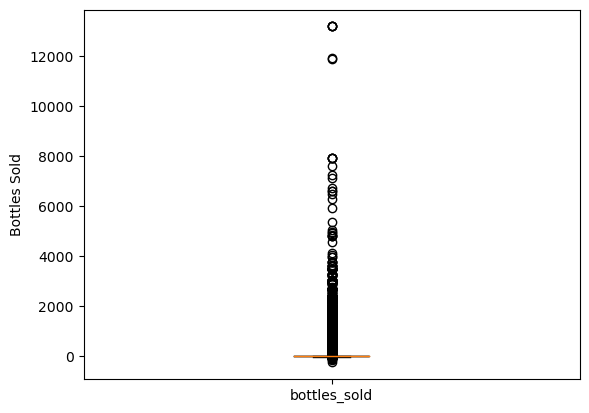

In [37]:
# box plot for a quantitative variable (‘Bottles sold’) from data frame
plt.boxplot(x=df_final_liquor['bottles_sold'], labels=['bottles_sold'])
plt.ylabel('Bottles Sold')

Observation:- The box plot illustrates the distribution of the number of bottles sold from a given dataset. The majority of the data clusters at lower quantities, indicating that most sales transactions involve smaller numbers of bottles. The median value, marked by the line within the box, is relatively low compared to the overall range, suggesting that the typical sale is not very large. There are several outliers depicted as individual points above the main cluster, highlighting transactions where significantly more bottles were sold. These outliers suggest occasional bulk purchases or larger orders. Overall, the plot shows that while most sales consist of fewer bottles, there are exceptional cases where sales volumes are substantially higher.

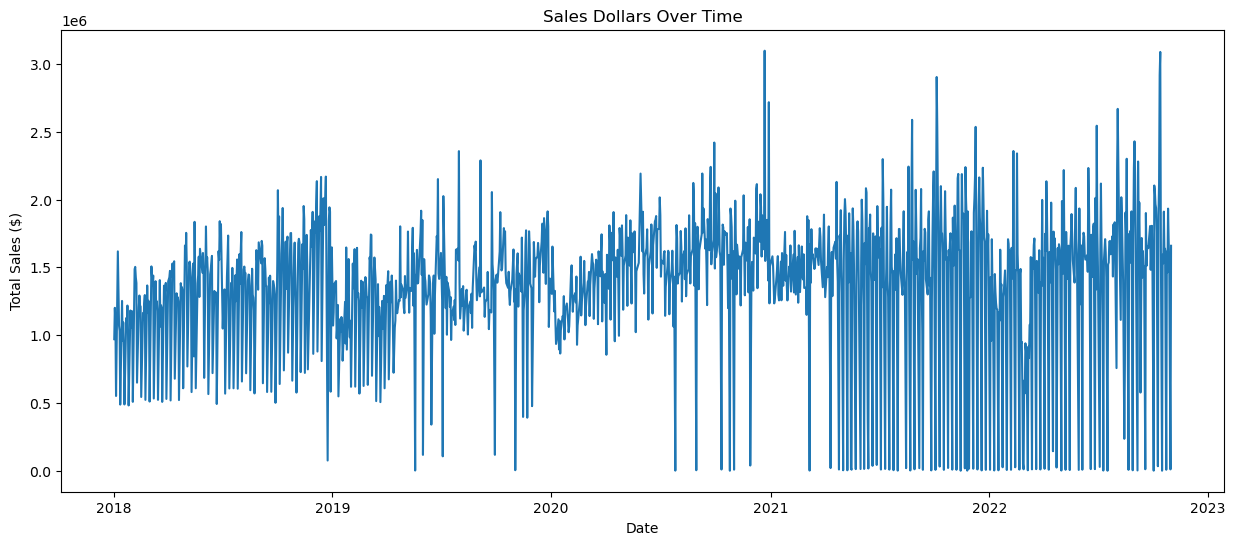

In [38]:
# Create a copy of the DataFrame to ensure the original is not modified
df = df_final_liquor.copy()

# Group by 'date' and sum 'sale_dollars', then reset the index in the copied DataFrame
df_sales_over_time = df.groupby('date')['sale_dollars'].sum().reset_index()

# Set up the figure size
plt.figure(figsize=(15, 6))

# Plot the time series plot
plt.plot(df_sales_over_time['date'], df_sales_over_time['sale_dollars'])

# Set the title and labels
plt.title('Sales Dollars Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')

# Show the plot
plt.show()

Observation:- The time series chart, titled "Sales Dollars Over Time," depicts monthly sales data spanning from 2018 to 2023. The graph reveals noticeable variability in sales across different periods, with distinct peaks indicative of potentially higher sales during specific months, possibly due to seasonal variations or targeted marketing campaigns. It also shows a pattern of cyclical fluctuations, likely reflecting consistent shifts in consumer purchasing behavior or the impact of seasonal sales initiatives. Notably, the years 2020 and 2021 feature some of the most pronounced peaks, which could be attributed to external influences like shifts in consumer habits due to unique events or broader economic changes. Although there are these periodic variations, the overall trend does not demonstrate a definitive long-term increase or decrease, implying a generally stable sales trajectory throughout the observed timeframe. In essence, while the business generally sustains steady sales, there are exceptional months with significant deviations that warrant further analysis to pinpoint their causes.

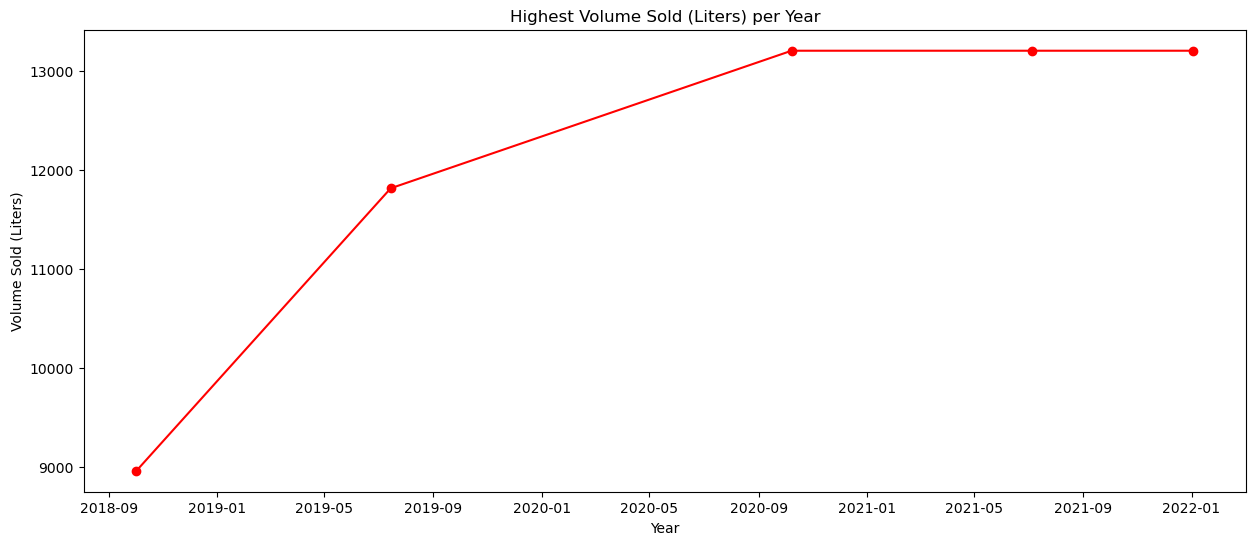

In [39]:
# It provides a copy of the DataFrame to ensure the original is unchanged
df_final_liquor_copy = df_final_liquor.copy()

# It adds a 'year' column to the copy of the DataFrame
df_final_liquor_copy['year'] = pd.to_datetime(df_final_liquor_copy['date']).dt.year

# Group by 'year' in the copy and find the date with the maximum 'volume_sold_liters' for each year
max_volume_per_year = df_final_liquor_copy.groupby('year').apply(lambda x: x.loc[x['volume_sold_liters'].idxmax()])

# Set up the figure size
plt.figure(figsize=(15, 6))

# Create the line plot for the maximum 'volume_sold_liters' per year using the copy
plt.plot(max_volume_per_year['date'], max_volume_per_year['volume_sold_liters'], 'o-', color='red')
plt.title('Highest Volume Sold (Liters) per Year')
plt.xlabel('Year')
plt.ylabel('Volume Sold (Liters)')

# Show the plot
plt.show()

Observation:- The line graph titled "Highest Volume Sold (Liters) per Year" illustrates the annual peak sales volume of liquor in liters from late 2018 to 2021. It displays a clear upward progression in the maximum volume sold, beginning at approximately 10,000 liters and climbing steadily to nearly 13,000 liters by 2021. This consistent rise indicates an improvement in sales volume year over year, suggesting a boost in consumer demand or broader market coverage. The gradual increase could also be attributed to effective marketing tactics or enhanced distribution networks. Overall, the chart demonstrates a positive development in sales volume over the observed period, highlighting the business's potential for market growth and expansion.

## The analysis below focuses on the top 10 entries due to the extensive size of the dataset and to ensure clarity in the visualization.

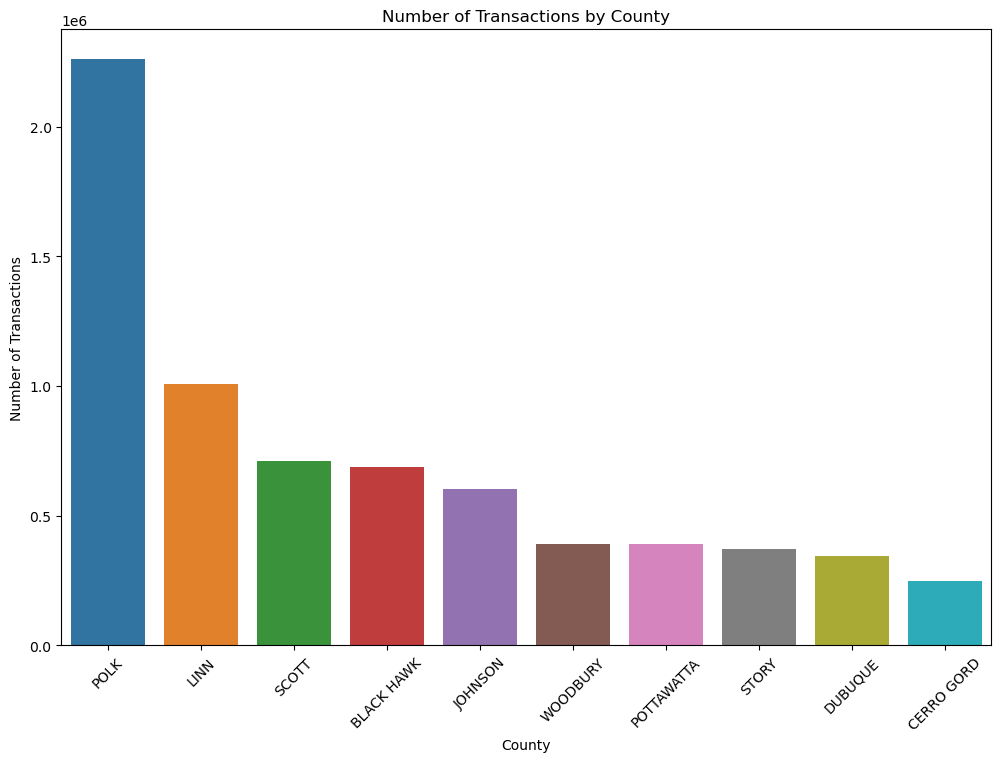

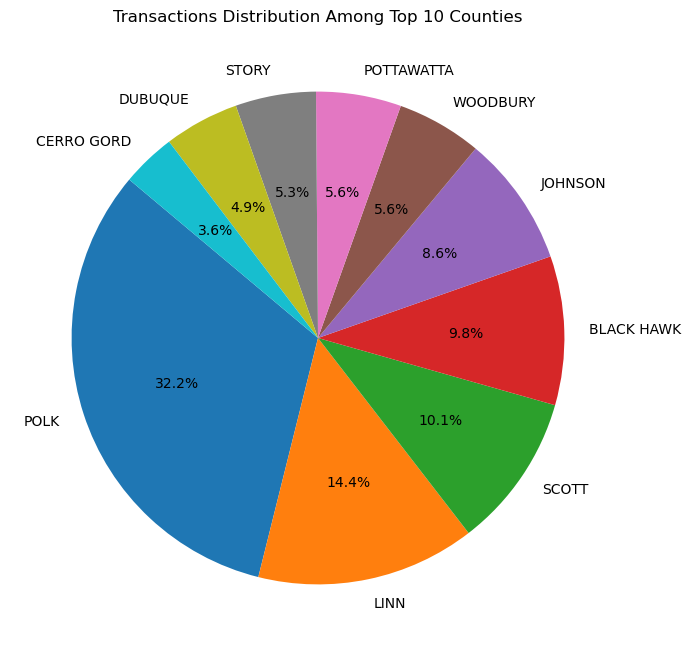

In [40]:
# Calculate the number of transactions by county and select the top 10
top_counties = df_final_liquor['county'].value_counts().nlargest(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_counties.index, y=top_counties.values)

# Set the title and labels
plt.title('Number of Transactions by County')
plt.xlabel('County')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(top_counties, labels=top_counties.index, autopct='%1.1f%%', startangle=140)
plt.title('Transactions Distribution Among Top 10 Counties')

# Show the plot
plt.show()

Observation:- The displayed charts detail the transaction volumes by county, focusing on the top ten counties with the highest number of transactions. In the bar chart, Polk County is markedly ahead, conducting more than twice the number of transactions as Linn County, which ranks second. The subsequent counties, including Scott, Johnson, and Black Hawk, also have significant transaction counts, highlighting them as active commercial centers. The pie chart complements this by showing that Polk County alone contributes to 32.2% of the transactions among these top counties, underscoring its prominent market share. Scott and Johnson are notable too, with 14.4% and 10.1% of transactions, respectively. Collectively, these visualizations highlight the regional concentration of business activities, pointing to specific areas as commercial hubs within the state.

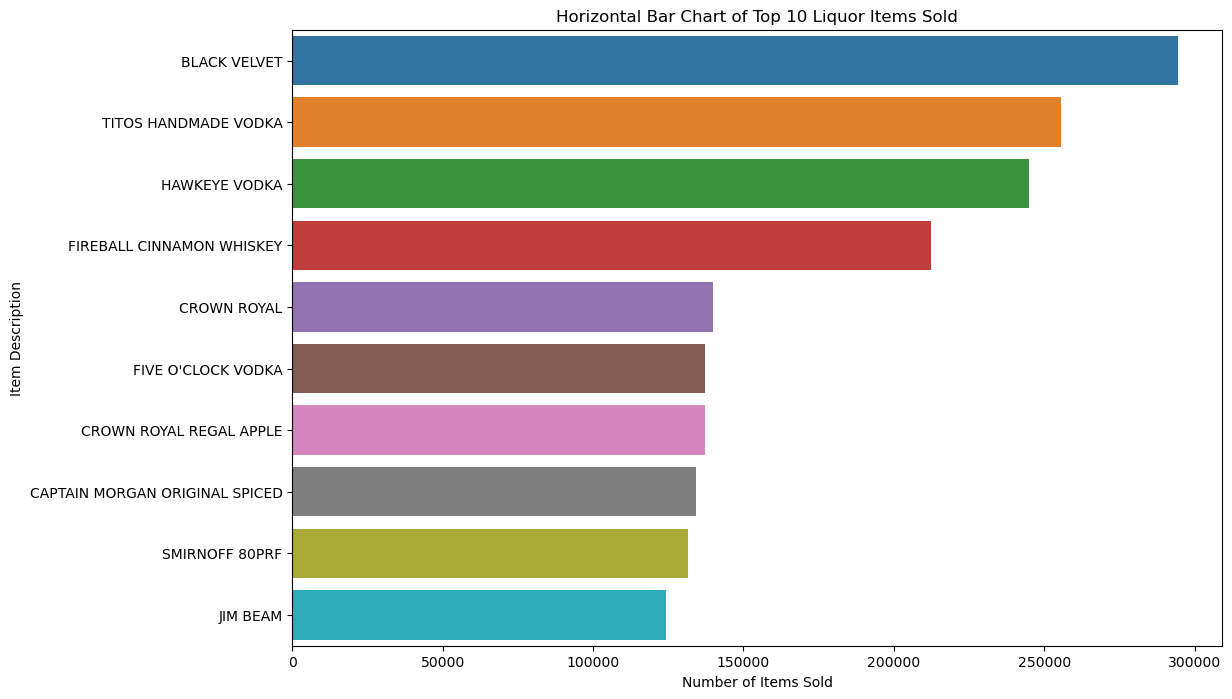

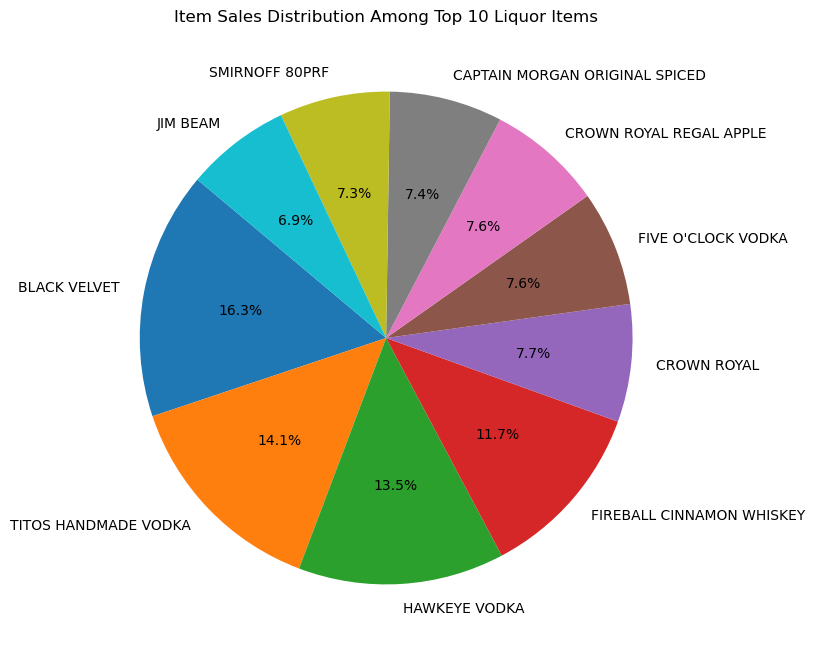

In [41]:
# calculate the sales counts for the top 10 items
item_sales = df_final_liquor['item_description'].value_counts()[:10]

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=item_sales.values, y=item_sales.index)

# Set the title and labels
plt.title('Horizontal Bar Chart of Top 10 Liquor Items Sold')
plt.xlabel('Number of Items Sold')
plt.ylabel('Item Description')
plt.show()

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(item_sales, labels=item_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Item Sales Distribution Among Top 10 Liquor Items')

# Show the Plot
plt.show()

Observation:- The provided charts illustrate the sales distribution of the top ten liquor products, using both a horizontal bar chart and a pie chart for visual representation. Black Velvet clearly dominates in sales volume, appearing as the most purchased item, significantly outpacing the second-highest, Titos Handmade Vodka. The sales rankings include other prominent liquors like Hawkeye Vodka and Fireball Cinnamon Whiskey, which also have substantial market shares. In the pie chart, Black Velvet constitutes the largest portion at 16.3%, underscoring its market dominance among the top liquors. Titos Handmade Vodka and Hawkeye Vodka also hold considerable shares, at 14.1% and 11.7% respectively. Collectively, these visuals effectively highlight the sales distribution and popularity hierarchy within the top-selling liquor products.

## Given the extensive size of dataset. The analysis performed focuses on the categorical-categorical (C-C) relationship. Specifically, it considers top 10 sales dollars, vendor names, city, store name and category name columns for clear visualization.

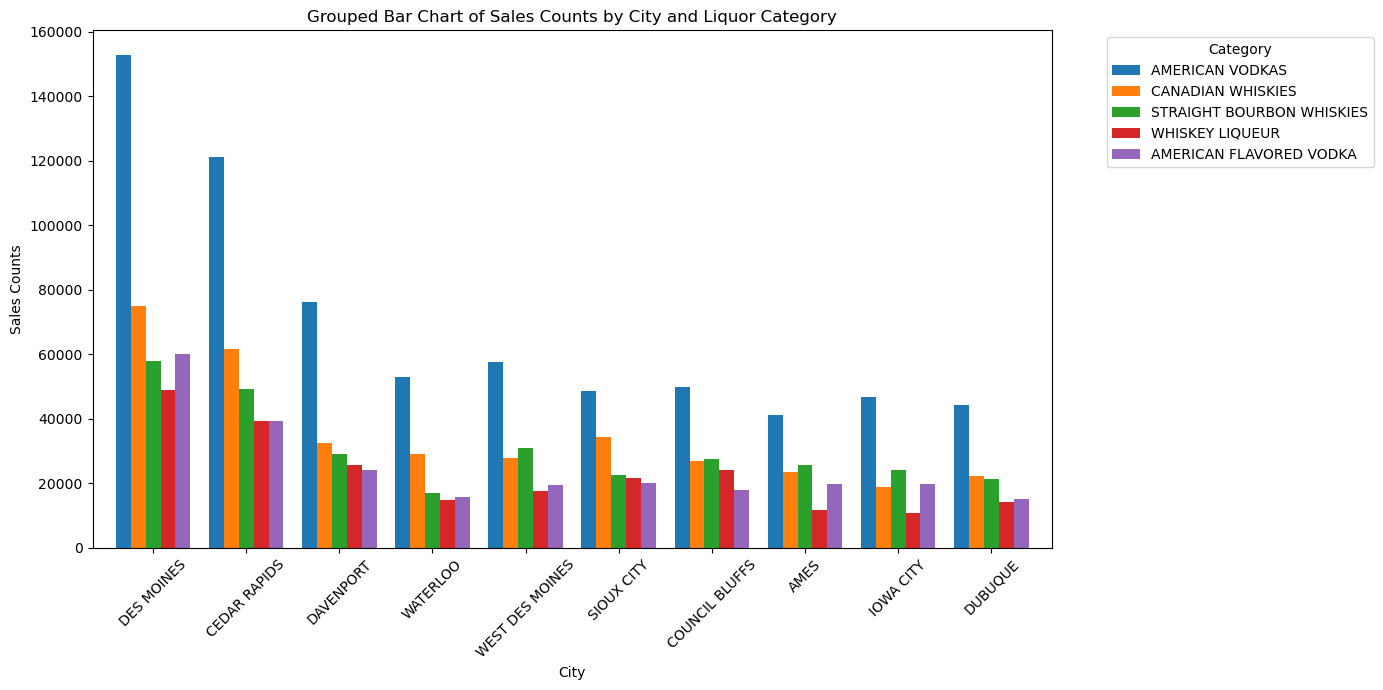

In [42]:
# Group the data by 'city' and 'category_name' and count the occurrences
city_category_counts = df_final_liquor.groupby(['city', 'category_name']).size().reset_index(name='counts')

# Pivot this data so that 'city' is indexed and each 'category_name' is a column
city_category_pivot = city_category_counts.pivot(index='city', columns='category_name', values='counts')

# For visualization, It provides we might limit to the top 10 cities and top 5 categories by count
top_cities = city_category_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
top_categories = city_category_pivot.sum(axis=0).sort_values(ascending=False).head(5).index
city_category_pivot = city_category_pivot.loc[top_cities, top_categories]

# It creates the grouped bar chart
city_category_pivot.plot(kind='bar', figsize=(14, 7), width=0.8)

# Setup the title and labels
plt.title('Grouped Bar Chart of Sales Counts by City and Liquor Category')
plt.xlabel('City')
plt.ylabel('Sales Counts')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Observation:- The grouped bar chart illustrates the distribution of liquor sales across the top ten cities, emphasizing different liquor categories. Des Moines is highlighted as the top consumer, with American Vodkas showing exceptionally high sales, a trend also prominent in Cedar Rapids and Davenport. Canadian Whiskies and American Flavored Vodkas are widely sold in cities like Ames and Iowa City, indicating a broad appeal. In Cedar Rapids, there is a varied taste profile with strong sales across several categories, though American Vodkas dominate. Smaller cities such as Waterloo and Council Bluffs show a preference for Whiskey Liqueur and Straight Bourbon Whiskies. This visualization clearly depicts the preferences for liquor types in key Iowa cities, providing valuable insights into regional market dynamics and consumer trends.

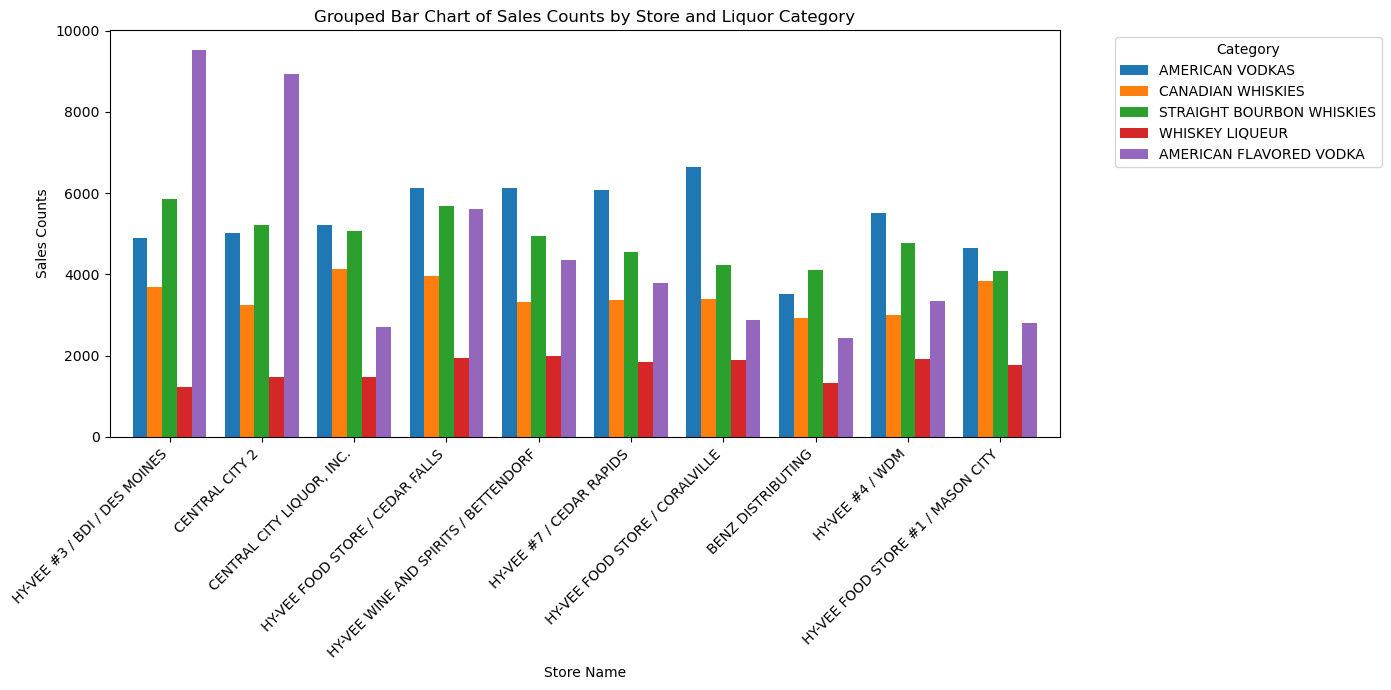

In [43]:
# Group the data by 'city' and 'category_name' and count the occurrences
city_category_counts = df_final_liquor.groupby(['store_name', 'category_name']).size().reset_index(name='counts')

# Pivot this data so that 'city' is indexed and each 'category_name' is a column
city_category_pivot = city_category_counts.pivot(index='store_name', columns='category_name', values='counts')

# For visualization, we might limit to the top 10 cities and top 5 categories by count
top_stores = city_category_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
top_categories = city_category_pivot.sum(axis=0).sort_values(ascending=False).head(5).index
city_category_pivot = city_category_pivot.loc[top_stores, top_categories]

# Create the grouped bar chart
city_category_pivot.plot(kind='bar', figsize=(14, 7), width=0.8)

# Setup the title and labels
plt.title('Grouped Bar Chart of Sales Counts by Store and Liquor Category')
plt.xlabel('Store Name')
plt.ylabel('Sales Counts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Observation:- The grouped bar chart displays sales counts for various liquor categories across selected stores, revealing distinct purchasing trends at each location. Stores like "Hy-Vee #3 / BDI / Des Moines" and "Central City 2nd St" stand out with notably high sales, particularly in American Vodkas and Canadian Whiskies. The chart highlights a strong preference for American Vodkas across most stores, suggesting it is a universally favored category. Canadian Whiskies and American Flavored Vodka also show robust sales, reflecting their popularity among buyers. Even smaller outlets, such as "Hy-Vee #1 / Mason City," demonstrate a diverse range of category sales, albeit at lower volumes than their larger counterparts. This visualization provides a clear overview of consumer preferences and sales dynamics within different retail environments, showcasing how specific liquor categories dominate in various stores.

<Figure size 1600x1000 with 0 Axes>

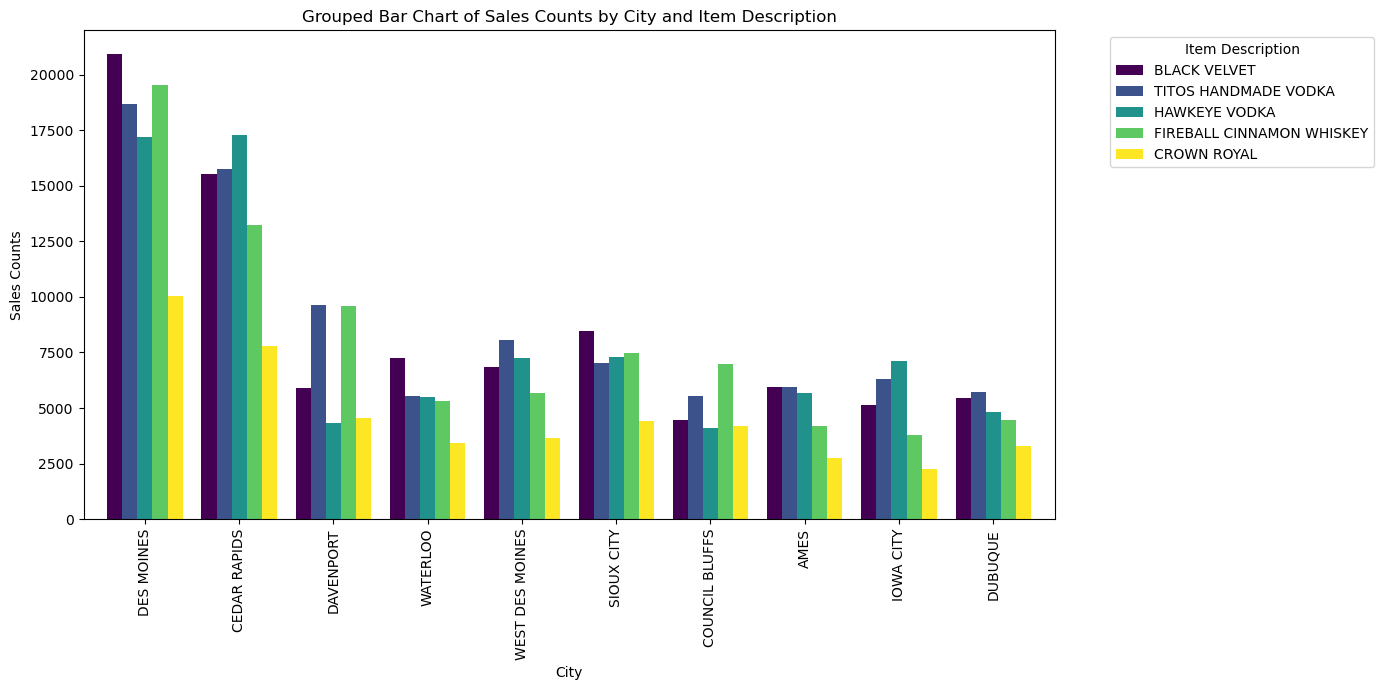

In [62]:
# Group the data by 'city' and 'item_description' and count the occurrences
city_item_counts = df_final_liquor.groupby(['city', 'item_description']).size().reset_index(name='counts')

# Pivot this data so that 'city' is indexed and each 'item_description' is a column
city_item_pivot = city_item_counts.pivot(index='city', columns='item_description', values='counts')

# For visualization, limit to the top 10 cities and top 5 items by count
top_cities = city_item_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
top_items = city_item_pivot.sum(axis=0).sort_values(ascending=False).head(5).index
city_item_pivot = city_item_pivot.loc[top_cities, top_items]

# Create the grouped bar chart
plt.figure(figsize=(16, 10))  # Enlarged figure for better clarity
city_item_pivot.plot(kind='bar', figsize=(14, 7), width=0.8, colormap='viridis')

# Setup the title and labels
plt.title('Grouped Bar Chart of Sales Counts by City and Item Description')
plt.xlabel('City')
plt.ylabel('Sales Counts')
plt.xticks(rotation=90)
plt.legend(title='Item Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Observation:- The grouped bar chart visualizes the sales counts for various liquor item descriptions across the top ten cities in the dataset. Des Moines leads in sales across multiple item categories, highlighting its prominence in liquor sales relative to other cities. Cities like Cedar Rapids and Davenport also show significant sales, especially for popular items like Black Velvet and Tito's Handmade Vodka. The chart indicates that certain items, such as Fireball Cinnamon Whiskey and Crown Royal, have broad appeal across multiple cities, consistently appearing in the sales data. Notably, the distribution of sales among the cities varies, with some like Ames and Sioux City showing more focused preferences for specific liquor types. Overall, the visualization helps in identifying regional sales trends and the popularity of specific liquor types, aiding in targeted marketing strategies.

## The analysis performed focuses on the quantity-quantity (Q-Q) relationship, where linear correlation and least squares regression lines are calculated within scatter plots. Specifically, it considers sales dollars, volume sold in liters, number of bottles sold, and bottle volume in milliliters columns.

Correlation coefficient between bottles sold and volume sold in liters: 0.8587713496117658


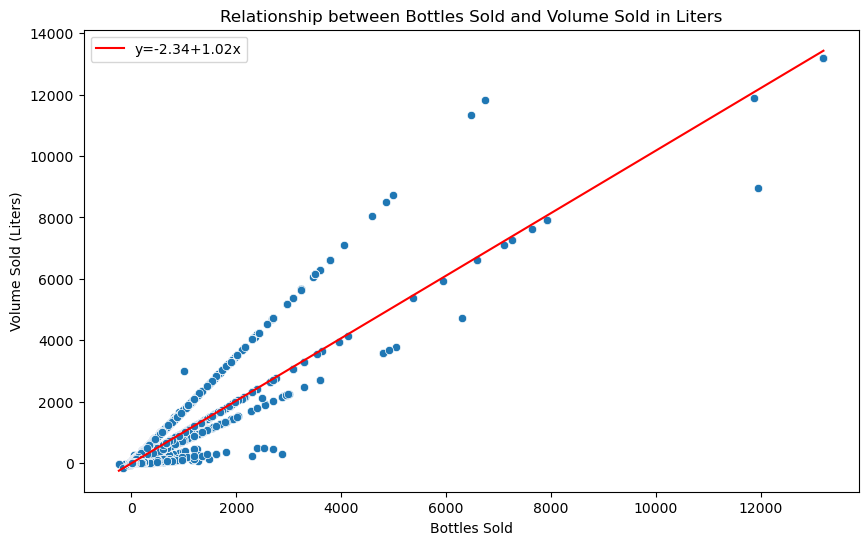

In [45]:
# Create a scatter plot to examine the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bottles_sold', y='volume_sold_liters', data=df_final_liquor)

# Calculate the linear correlation
correlation = df_final_liquor['bottles_sold'].corr(df_final_liquor['volume_sold_liters'])
print(f"Correlation coefficient between bottles sold and volume sold in liters: {correlation}")

# Calculate least squares regression
slope, intercept, r_value, p_value, std_err = linregress(df_final_liquor['bottles_sold'], df_final_liquor['volume_sold_liters'])

# Add the regression line to the scatter plot
x = np.array([min(df_final_liquor['bottles_sold']), max(df_final_liquor['bottles_sold'])])
y = intercept + slope * x
plt.plot(x, y, '-r', label=f'y={intercept:.2f}+{slope:.2f}x')

# Create the plot
plt.title('Relationship between Bottles Sold and Volume Sold in Liters')
plt.xlabel('Bottles Sold')
plt.ylabel('Volume Sold (Liters)')
plt.legend()

# Show the plot
plt.show()

Observation:- The scatter plot with its regression analysis demonstrates the connection between bottles sold and volume sold in liters. A correlation coefficient of 0.8587 indicates a very strong positive linear relationship, meaning that increases in the number of bottles sold generally correspond to increases in the volume sold. The regression equation, shows that for each additional bottle sold, there's an expected increase of approximately 1.02 liters in the volume sold. Most data points fit closely to the regression line, especially at lower and middle sales ranges, highlighting a consistent relationship. However, some outliers are visible at higher sales volumes, suggesting variations like bulk transactions that may deviate from typical sales patterns. This analysis confirms that the number of bottles sold is a reliable predictor of the total volume sold, useful for strategic planning in liquor sales.

Correlation coefficient between bottles sold and sale dollars: 0.818505803581472


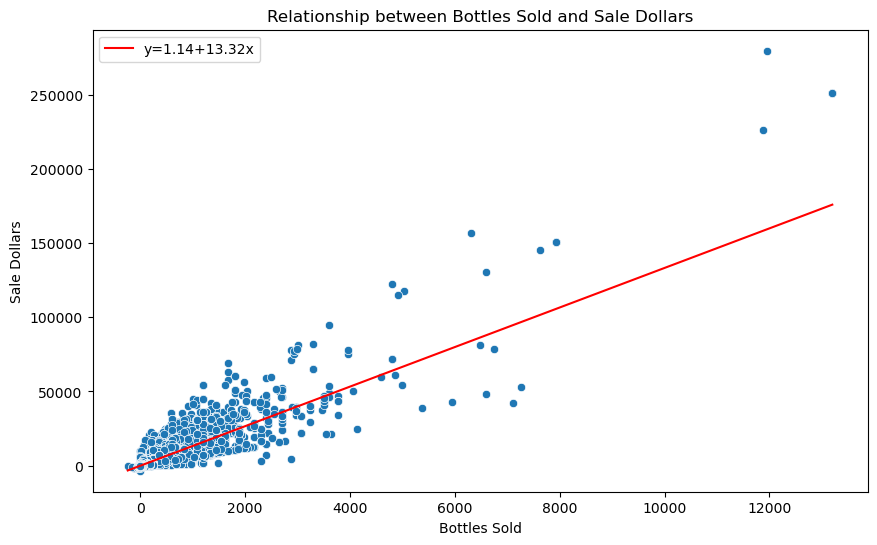

In [46]:
# Create a scatter plot to examine the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bottles_sold', y='sale_dollars', data=df_final_liquor)

# Calculate the linear correlation
correlation = df_final_liquor['bottles_sold'].corr(df_final_liquor['sale_dollars'])
print(f"Correlation coefficient between bottles sold and sale dollars: {correlation}")

# Calculate least squares regression
slope, intercept, r_value, p_value, std_err = linregress(df_final_liquor['bottles_sold'], df_final_liquor['sale_dollars'])

# Add the regression line to the scatter plot
x = np.array([min(df_final_liquor['bottles_sold']), max(df_final_liquor['bottles_sold'])])
y = intercept + slope * x
plt.plot(x, y, '-r', label=f'y={intercept:.2f}+{slope:.2f}x')

# Create the plot
plt.title('Relationship between Bottles Sold and Sale Dollars')
plt.xlabel('Bottles Sold')
plt.ylabel('Sale Dollars')
plt.legend()

# Show the plot
plt.show()

Observation:- The scatter plot displays a clear positive correlation between the number of bottles sold and the sales revenue, as depicted by a correlation coefficient of 0.8186. This relationship is quantified by the regression equation is indicating that each additional bottle sold typically increases revenue by approximately $1.14. The majority of the data points are closely aligned with the regression line, particularly at lower sales levels, which confirms the consistency of the relationship. There are, however, some deviations at higher sales numbers where revenue disproportionately increases, possibly reflecting sales of higher-priced items. This visualization effectively demonstrates that the quantity of bottles sold is a reliable indicator of financial performance. Overall, the data provides a solid foundation for revenue projections and strategic sales planning in this market.

Correlation coefficient between volume sold in liters and sale dollars: 0.8381582623891896


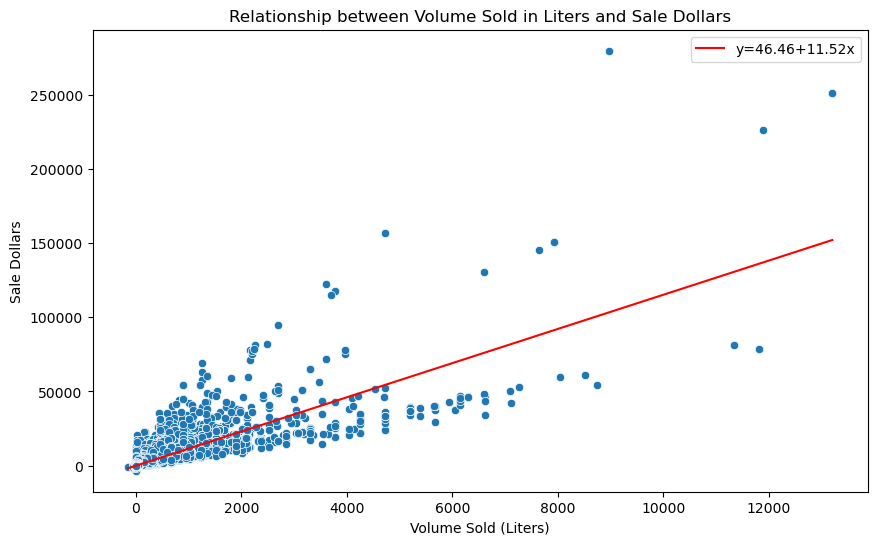

In [47]:
# Create a scatter plot to examine the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volume_sold_liters', y='sale_dollars', data=df_final_liquor)

# Calculate the linear correlation
correlation = df_final_liquor['volume_sold_liters'].corr(df_final_liquor['sale_dollars'])
print(f"Correlation coefficient between volume sold in liters and sale dollars: {correlation}")

# Calculate least squares regression
slope, intercept, r_value, p_value, std_err = linregress(df_final_liquor['volume_sold_liters'], df_final_liquor['sale_dollars'])

# Add the regression line to the scatter plot
x = np.array([min(df_final_liquor['volume_sold_liters']), max(df_final_liquor['volume_sold_liters'])])
y = intercept + slope * x
plt.plot(x, y, '-r', label=f'y={intercept:.2f}+{slope:.2f}x')

# Create the plot
plt.title('Relationship between Volume Sold in Liters and Sale Dollars')
plt.xlabel('Volume Sold (Liters)')
plt.ylabel('Sale Dollars')
plt.legend()

# Show the plot
plt.show()

Observation:- The scatter plot presents the relationship between the volume of liquor sold in liters and the corresponding sales revenue in dollars. With a correlation coefficient of 0.8381, the data exhibits a robust positive linear relationship, indicating that higher volumes sold generally lead to higher sales revenue. The regression equation quantifies this relationship, revealing that each additional liter sold tends to increase revenue by about $11.52. The majority of data points align closely with this regression line, particularly at lower sales volumes, showcasing a strong correlation. Some deviations at higher volumes suggest the presence of anomalies, possibly due to special pricing arrangements or premium product sales. This analysis underscores that volume sold is a key predictor of sales revenue, crucial for effective planning and financial projections in the liquor industry.

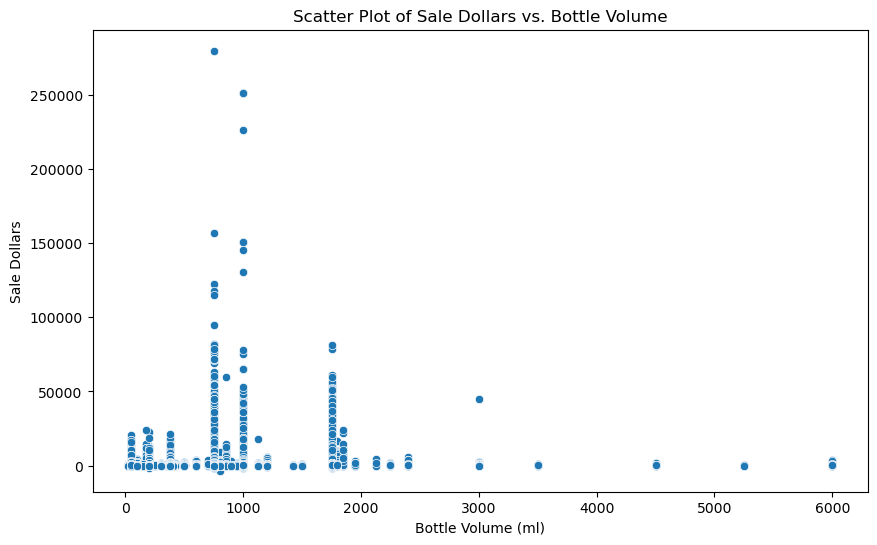

In [48]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bottle_volume_ml', y='sale_dollars', data=df_final_liquor)

# Setup the title and label
plt.title('Scatter Plot of Sale Dollars vs. Bottle Volume')
plt.xlabel('Bottle Volume (ml)')
plt.ylabel('Sale Dollars')

# Show the plot
plt.show()

Observation:- The scatter plot depicts the relationship between the volume of bottles sold in milliliters and their corresponding sales revenue in dollars. It predominantly features a concentration of sales data around smaller bottle sizes, without displaying a direct relationship between volume and revenue, suggesting that smaller bottles are not necessarily associated with lesser sales. Many data points for smaller volumes are linked with relatively high sales revenue, possibly due to higher unit prices or significant sales quantities. The data is broadly distributed, with notable outliers showing very high sales for specific bottle sizes, potentially indicating premium-priced products or large-scale purchases. There is a noticeable aggregation of sales around the 750 ml mark, typical for many alcoholic beverages, suggesting it as a standard purchase size. Overall, the chart indicates that sales figures across various bottle volumes are complex and reflect a wide range of consumer preferences and purchasing patterns within the liquor industry.

## Given the extensive size of the dataset, the analysis performed focuses on the categorical-quantity (C-Q) relationship to ensure clear visualization. It specifically consider the top 10 cities, sales dollars, state bottle cost, store name, volume sold in liters, and vendor name columns.

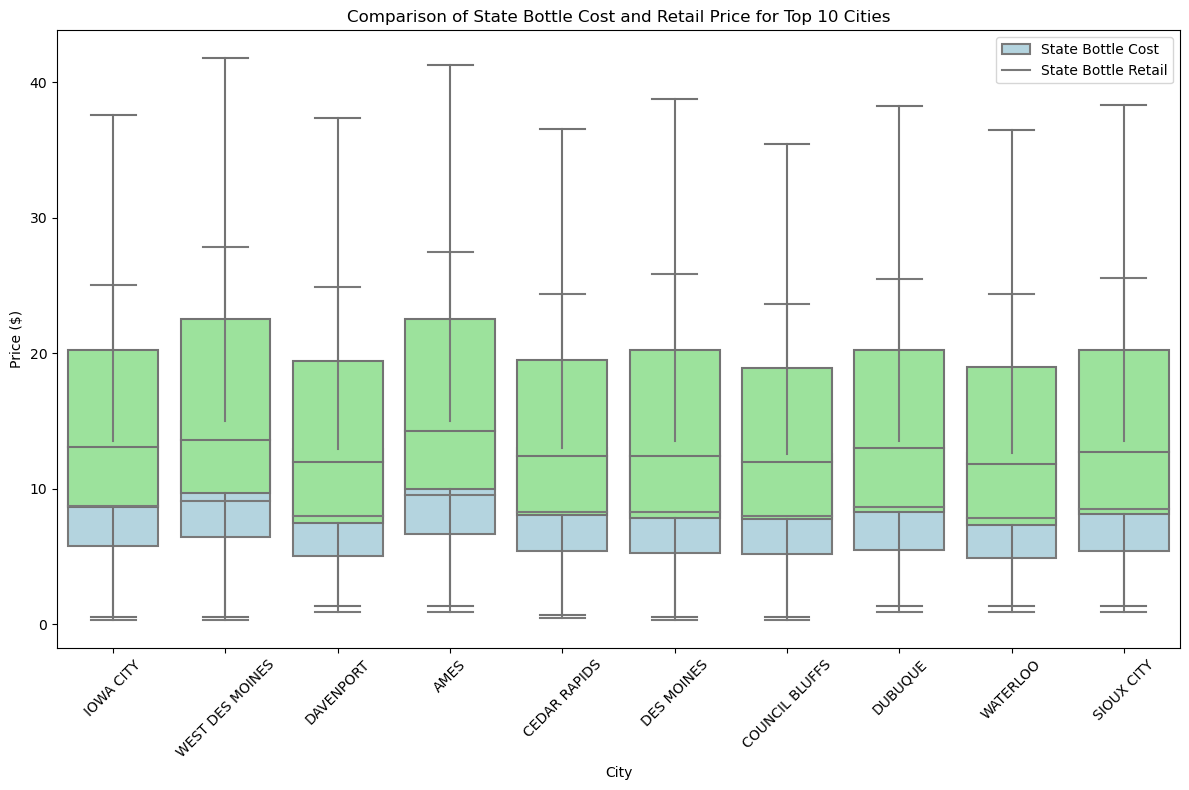

Descriptive Statistics for State Bottle Cost:
count    4.653334e+06
mean     1.086576e+01
std      1.180893e+01
min      3.300000e-01
25%      5.400000e+00
50%      8.260000e+00
75%      1.350000e+01
max      2.298840e+03
Name: state_bottle_cost, dtype: float64

Descriptive Statistics for State Bottle Retail:
count    4.653334e+06
mean     1.630071e+01
std      1.771332e+01
min      5.000000e-01
25%      8.100000e+00
50%      1.239000e+01
75%      2.025000e+01
max      3.448260e+03
Name: state_bottle_retail, dtype: float64


In [49]:
# The top 10 cities based on total sales
top_10_cities = df_final_liquor.groupby('city')['sale_dollars'].sum().nlargest(10).index

# Filter the DataFrame to include only data from the top 10 cities
df_top_10_cities = df_final_liquor[df_final_liquor['city'].isin(top_10_cities)]

# Create a boxplot for state bottle cost and retail price for the top 10 cities
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10_cities, x='city', y='state_bottle_cost', color='lightblue', showfliers=False)
sns.boxplot(data=df_top_10_cities, x='city', y='state_bottle_retail', color='lightgreen', showfliers=False)
plt.title('Comparison of State Bottle Cost and Retail Price for Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(['State Bottle Cost', 'State Bottle Retail'])
plt.tight_layout()

# Display the plot
plt.show()

# Calculate descriptive statistics for 'state_bottle_cost' and 'state_bottle_retail'
desc_stats_bottle_cost = df_top_10_cities['state_bottle_cost'].describe()
desc_stats_bottle_retail = df_top_10_cities['state_bottle_retail'].describe()

# Print the descriptive statistics
print("Descriptive Statistics for State Bottle Cost:")
print(desc_stats_bottle_cost)
print("\nDescriptive Statistics for State Bottle Retail:")
print(desc_stats_bottle_retail)

Observation:- The box plots and descriptive statistics shown illustrate the comparison of state bottle cost and retail price across the top 10 cities in terms of total sales. The data reveals considerable variability in both cost and retail prices among the cities, suggesting diverse market dynamics and pricing strategies. Typically, retail prices are higher than the costs, indicating the markup applied by stores. The box plots demonstrate that some cities have wider price ranges, pointing to a potentially higher volatility in pricing or a broader selection of products. The descriptive statistics confirm this observation with specific figures on mean, median, standard deviation, and range, providing a quantitative backing to the visual insights. Overall, this analysis highlights the importance of geographical pricing strategies and could guide targeted adjustments to enhance profitability in different markets.

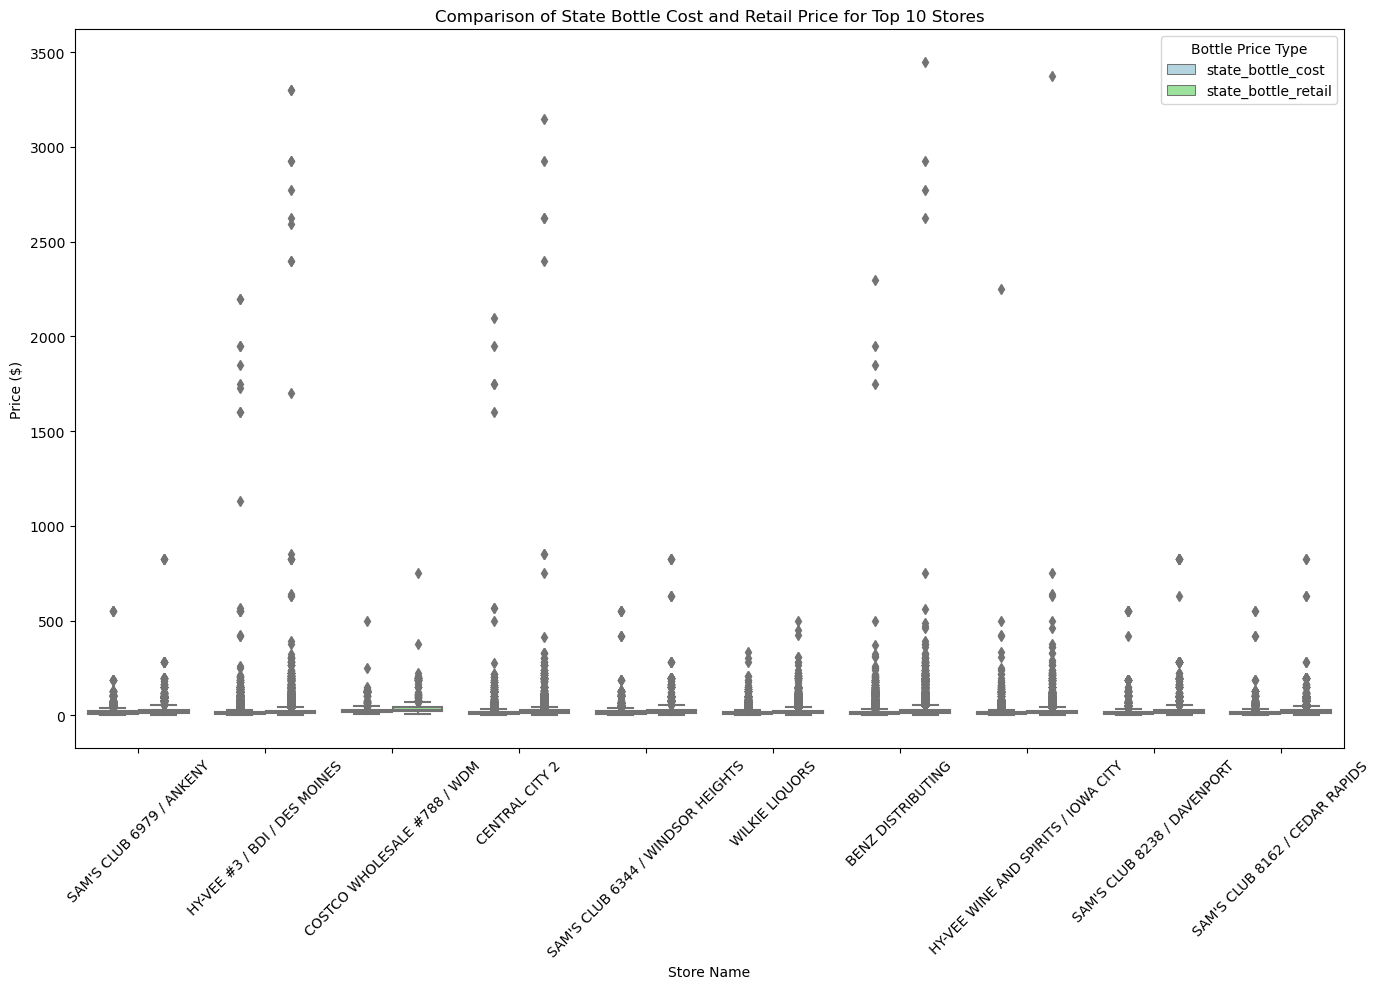

In [50]:
# Group the data by 'store_name' and get the top stores based on 'volume_sold_liters'
top_stores = df_final_liquor.groupby('store_name')['volume_sold_liters'].sum().nlargest(10).index

# Filter the DataFrame to only include data for the top stores
df_top_10_cities = df_final_liquor[df_final_liquor['store_name'].isin(top_stores)]

# Prepare the data: Stack 'state_bottle_cost' and 'state_bottle_retail' into a single column with an indicator
melted_data = pd.melt(df_top_10_cities, id_vars=['store_name'], value_vars=['state_bottle_cost', 'state_bottle_retail'],
                      var_name='Type', value_name='Price')

# Set up the figure size
plt.figure(figsize=(14, 10))

# Create side-by-side box plots
sns.boxplot(x='store_name', y='Price', hue='Type', data=melted_data, palette=['lightblue', 'lightgreen'])

# Set the title and labels
plt.title('Comparison of State Bottle Cost and Retail Price for Top 10 Stores')
plt.xlabel('Store Name')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Bottle Price Type')
plt.tight_layout()

# SHow the plot
plt.show()

Observation:- The box plots compare the state bottle cost and retail prices across the top 10 liquor stores by sales volume, depicted in lighter blue for cost and green for retail price, respectively. Each store is shown with dual plots indicating a significant markup from the wholesale cost to the consumer price. The retail prices generally soar above the costs, with a notably higher median retail price across all stores, demonstrating the typical markup applied. There's a wider spread in the retail prices than in the costs, suggesting a greater variability in retail pricing strategies compared to wholesale costs. Outliers in the retail data point to exceptionally high-priced bottles, likely reflecting sales of premium or specialty liquors. This graphic clearly outlines how each store manages its pricing structure, offering insights into the variations in market dynamics and consumer pricing across different locations.

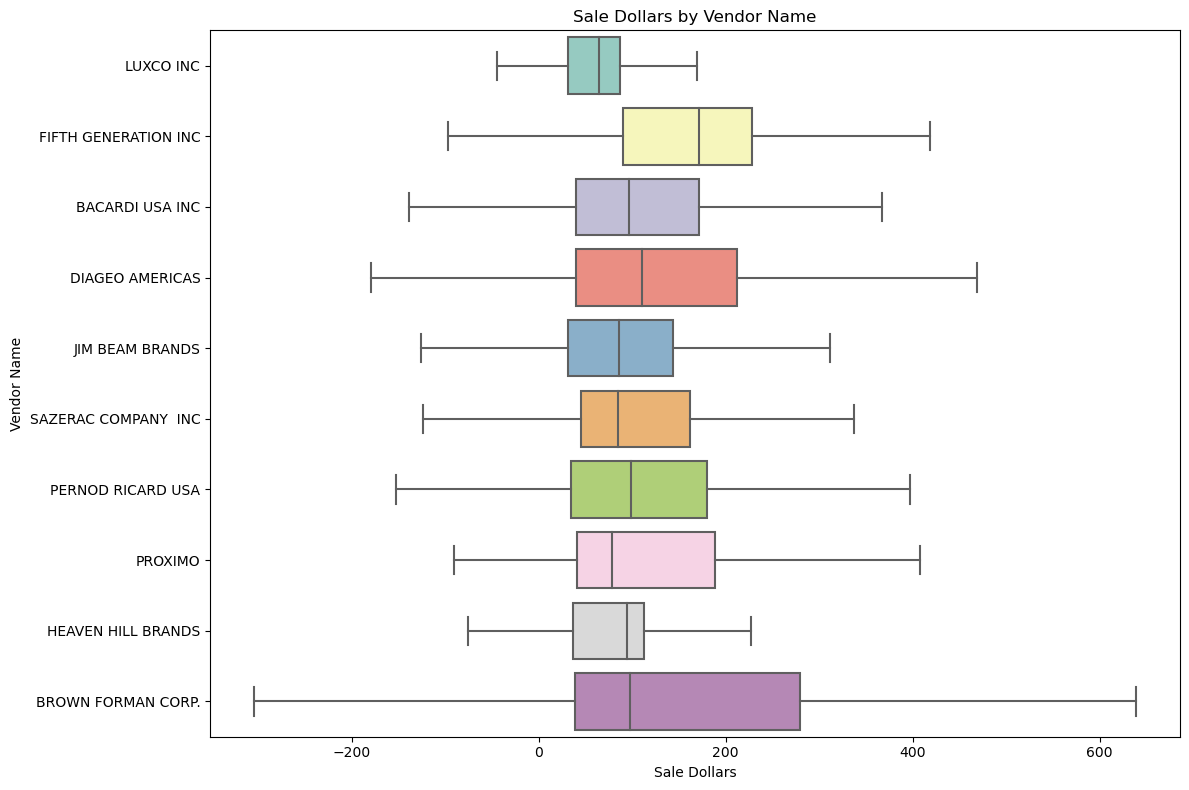

In [51]:
# Group by 'vendor_name' and sum 'sale_dollars', then get the top 10 vendors
top_vendors = df_final_liquor.groupby('vendor_name')['sale_dollars'].sum().nlargest(10).index

# Filter the DataFrame to include only data from these top 10 vendors
filtered_data = df_final_liquor[df_final_liquor['vendor_name'].isin(top_vendors)]

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create the boxplot for sale dollars by vendor name
sns.boxplot(x='sale_dollars', y='vendor_name', data=filtered_data, showfliers=False, palette="Set3")

# Set the title and labels
plt.title('Sale Dollars by Vendor Name')
plt.xlabel('Sale Dollars')
plt.ylabel('Vendor Name')
plt.tight_layout()

# Show the plot
plt.show()

Observation:- The boxplot illustrates sales revenue distribution for the top ten liquor vendors, with each vendor uniquely colored, showcasing their sales ranges horizontally. Brown Forman Corp exhibits the broadest sales range, indicating a significant variability in either their pricing or the volumes sold. In comparison, Luxco Inc. displays a tighter sales distribution, suggesting their sales figures are relatively consistent. The median sales value for each vendor is marked centrally in their respective boxes, with Brown Forman Corp, Diageo Americas, and Jim Beam Brands registering higher median sales compared to others like Fifth Generation Inc. and Bacardi USA Inc. This chart effectively delineates the variations in sales success among these vendors, reflecting potential differences in their market penetration, pricing models, or the diversity of their product offerings.

## "Inventory Management"

#### Overview:

This inventory management is an excellent example of how statistical models and data analysis can be directly applied to improve operational efficiencies in retail or wholesale environments. By basing inventory decisions on actual demand data and statistical measures of variability, businesses can minimize costs while maintaining service levels that prevent lost sales due to out-of-stock situations.

#### Note: 

Due to the extensive size of the dataset, the graphs presented are based on the top 10 or top 5 cities, categories and volume sold litres to ensure the visualizations are clear and manageable.

#### Inventory Management:

It is defined as "the process of ordering, storing, using, and selling a company's inventory. This includes the management of raw materials, components, and finished products, as well as warehousing and processing such items." 

#### Data Summary:

Data Source: A curated collection of sales data, emphasizing inventory management within the liquor distribution in the 
   state of Iowa, detailed by city and product category.

Objective: To streamline inventory levels based on quantitative analysis, targeting key metrics to enhance supply chain 
   efficiency.

Primary Metrics: 'city', 'category_name', 'volume_sold_liters'—crucial inputs for calculating 'safety_stock' and 
   'reorder_points', essential in aligning inventory with fluctuating market demands.

#### Importance in Business:

Cost Reduction: Inventory management helps in minimizing the costs associated with excess inventory and storage.

Efficiency: It increases operational efficiency by ensuring products are well-organized and easily accessible.

Revenue Maximization: By having the right products available at the right time, businesses can maximize sales opportunities.

Risk Mitigation: Proper inventory management reduces the risk of product obsolescence and spoilage.

#### Benefits:


Customer Satisfaction: Customers get what they want when they want it.

Better Data: Good inventory management provides valuable data that can be used to make informed purchasing and sales decisions.

Cash Flow Management: It helps in managing cash flow more effectively by avoiding unnecessary stockpiling.

#### Pitfalls to Avoid:

Overstocking: Holding too much inventory ties up capital and can lead to waste, especially if the stock is perishable or 
   becomes obsolete.

Understocking: Not having enough stock can lead to missed sales opportunities and can damage customer relationships.

Inaccurate Data: Poor inventory tracking can lead to erroneous stock levels, resulting in over- or under-ordering.

#### How this Inventory works:

Inventory Mechanics: At the core, it integrates sales history data to forecast demand patterns, helping the state of 
   Iowa anticipate inventory needs with greater accuracy.

Safety Stock Calculations: It employs statistical analysis to set optimal safety stock levels, ensuring resilience 
   against demand fluctuations and supply chain disruptions.

Reorder Point Formulation: By determining the precise moment when inventory should be replenished, and it helps maintain 
   a balance between excess stock and stockouts.

Sales Trend Analysis: This one not only reacts to current inventory needs but also identifies emerging trends to support 
   strategic decision-making.

In [52]:
# Service level of 95% which is also known as confidence interval
service_level = 0.95  

# Get the cities
cities = df_final_liquor['city'].value_counts().head().index

# Filter the dataframe for the top 5 cities
df_cities = df_final_liquor[df_final_liquor['city'].isin(cities)]

# Get the categories
categories = df_cities['category_name'].value_counts().head().index

# Filter the dataframe for the top 5 categories
df_categories = df_cities[df_cities['category_name'].isin(categories)]

# Calculate z-score
z_score = norm.ppf(service_level)
print("Z-score:", z_score)

Z-score: 1.6448536269514722


In [53]:
# 'volume_sold_liters' represents the demand data in the dataset

# Calculate the mean and standard deviation of demand
mean_demand = df_final_liquor['volume_sold_liters'].mean()
std_dev_demand = df_final_liquor['volume_sold_liters'].std()

# Calculate the safety stock based on the Z-score
safety_stock = z_score * std_dev_demand

# Display the calculated safety stock
print("Safety stock:", safety_stock)

Safety stock: 64.82068295614461


In [54]:
# Group the data by city and category name and calculate the standard deviation of daily demand for each city and category
demand_std_by_city_category = df_final_liquor.groupby(['city', 'category_name'])['volume_sold_liters'].std().reset_index()
demand_std_by_city_category.rename(columns={'volume_sold_liters': 'demand_std'}, inplace=True)

# Display the DataFrame showing the standard deviation of demand by city and category
print(demand_std_by_city_category)

          city                        category_name  demand_std
0       ACKLEY                   100% AGAVE TEQUILA    1.955760
1       ACKLEY                    AMERICAN BRANDIES    2.362227
2       ACKLEY          AMERICAN CORDIALS & LIQUEUR    2.669285
3       ACKLEY  AMERICAN DISTILLED SPIRIT SPECIALTY    2.889135
4       ACKLEY                    AMERICAN DRY GINS    3.999194
...        ...                                  ...         ...
18433  ZWINGLE       TEMPORARY & SPECIALTY PACKAGES    4.883738
18434  ZWINGLE                   TENNESSEE WHISKIES    3.334125
18435  ZWINGLE                           TRIPLE SEC    0.353553
18436  ZWINGLE                      WHISKEY LIQUEUR    5.626680
18437  ZWINGLE                            WHITE RUM    4.869267

[18438 rows x 3 columns]


In [55]:
# Group the data by city and category, and calculate the standard deviation of daily demand for each city and category
demand_std_by_city_category = df_final_liquor.groupby(['city', 'category_name'])['volume_sold_liters'].std().reset_index()
demand_std_by_city_category.columns = ['city', 'category_name', 'demand_std']

# Merge the standard deviation with the DataFrame containing average daily demand by city and category
average_demand_by_city_category = df_final_liquor.groupby(['city', 'category_name'])['volume_sold_liters'].mean().reset_index()
city_inventory = average_demand_by_city_category.merge(demand_std_by_city_category, on=['city', 'category_name'])

# Z-score for a 95% service level
z_score = 1.645  
# Assume refill time in days
refill_time = 7

# Calculate safety stock based on standard deviation of daily demand
city_inventory['safety_stock'] = z_score * city_inventory['demand_std']

# Calculate lead time demand
city_inventory['lead_time_demand'] = city_inventory['volume_sold_liters'] * refill_time

# Calculate reorder point
city_inventory['reorder_point'] = city_inventory['safety_stock'] + city_inventory['lead_time_demand']

# Display the inventory management results
print("Inventory management by City and Category:")
print(city_inventory)

Inventory management by City and Category:
          city                        category_name  volume_sold_liters  \
0       ACKLEY                   100% AGAVE TEQUILA            2.631053   
1       ACKLEY                    AMERICAN BRANDIES            2.999167   
2       ACKLEY          AMERICAN CORDIALS & LIQUEUR            3.253704   
3       ACKLEY  AMERICAN DISTILLED SPIRIT SPECIALTY            4.781250   
4       ACKLEY                    AMERICAN DRY GINS            9.131250   
...        ...                                  ...                 ...   
18433  ZWINGLE       TEMPORARY & SPECIALTY PACKAGES            5.928571   
18434  ZWINGLE                   TENNESSEE WHISKIES            4.354130   
18435  ZWINGLE                           TRIPLE SEC            1.250000   
18436  ZWINGLE                      WHISKEY LIQUEUR            8.225912   
18437  ZWINGLE                            WHITE RUM           10.377333   

       demand_std  safety_stock  lead_time_demand  reord

## The heatmap focuses on the top 5 entries due to the extensive size of the dataset and to ensure clarity in the visualization.

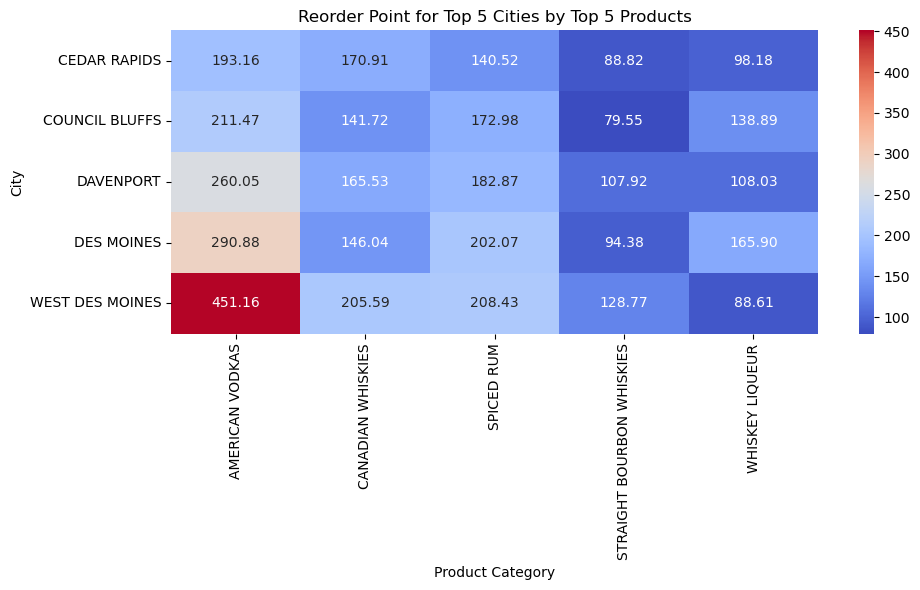

In [56]:
# Select the top 5 cities by total sales volume
top_5_cities = df_final_liquor.groupby('city')['volume_sold_liters'].sum().nlargest(5).index

# Select the top 5 products by total sales volume
top_5_products = df_final_liquor.groupby('category_name')['volume_sold_liters'].sum().nlargest(5).index

# Filter reorder points for the top 5 cities and top 5 products
reorder_point_top_5_cities_top_5_products = city_inventory[(city_inventory['city'].isin(top_5_cities)) & 
                                                           (city_inventory['category_name'].isin(top_5_products))]

# Pivot the dataframe to create a heatmap
reorder_point_heatmap_data = reorder_point_top_5_cities_top_5_products.pivot(index='city', 
                                                                             columns='category_name', 
                                                                             values='reorder_point')

# Create a heatmap to visualize the reorder point for each city and product
plt.figure(figsize=(10, 6))
sns.heatmap(data=reorder_point_heatmap_data, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Reorder Point for Top 5 Cities by Top 5 Products')
plt.xlabel('Product Category')
plt.ylabel('City')
plt.tight_layout()
plt.show()

Observation:- The heatmap displays reorder points for the top five liquor products across five major cities, highlighting strategic inventory needs. West Des Moines shows the highest reorder point at 451.16 for American Vodkas, suggesting a robust demand and possibly frequent sales of this product in that city. The lowest reorder point is observed in Council Bluffs for Spiced Rum, at just 79.55, indicating a lower demand and possibly slower turnover for this category there. This contrast in reorder points across cities and products underscores the need for tailored inventory management strategies to match local consumer preferences and sales patterns. Cities like West Des Moines require diligent stock replenishment particularly for American Vodkas to prevent potential stockouts. In contrast, Council Bluffs could potentially reduce the stock levels of Spiced Rum to align better with the lesser demand, optimizing storage and reducing holding costs.

## The analysis below focuses on the top 10 entries due to the extensive size of the dataset and to ensure clarity in the visualization.

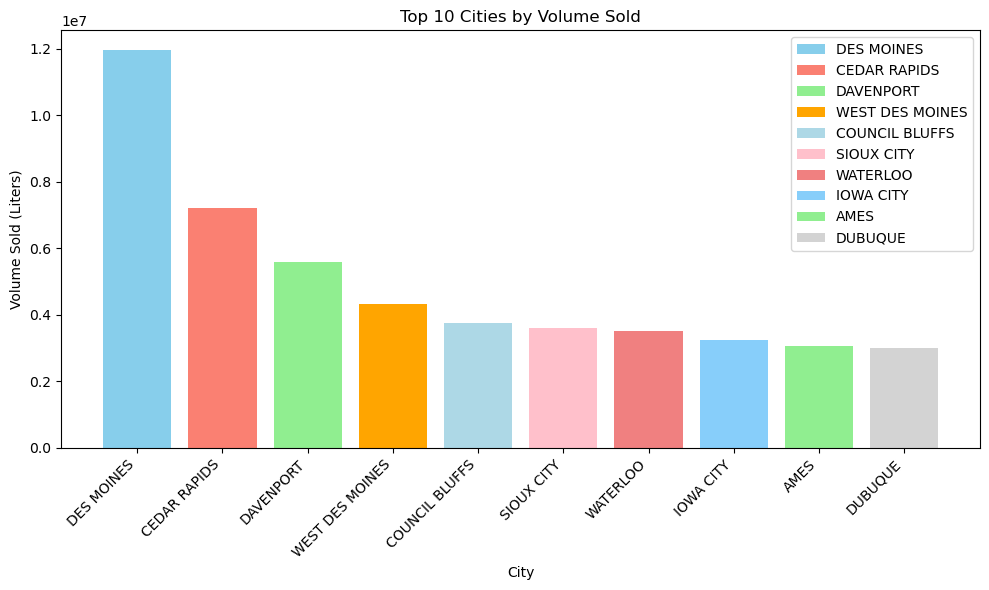

In [57]:
# Get the top 10 cities by volume sold
top_10_cities = df_final_liquor.groupby('city')['volume_sold_liters'].sum().nlargest(10).index
top_10_volumes = df_final_liquor.groupby('city')['volume_sold_liters'].sum().nlargest(10).values

# Define colors for each bar
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightblue', 'pink', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightgrey']

# Create the bar plot with specified colors
plt.figure(figsize=(10, 6))
bar_container = plt.bar(top_10_cities, top_10_volumes, color=colors)
plt.title('Top 10 Cities by Volume Sold')
plt.xlabel('City')
plt.ylabel('Volume Sold (Liters)')
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend([bar_container[idx] for idx in range(len(top_10_cities))], top_10_cities)
plt.tight_layout()
plt.show()

Observation:- The bar chart ranks the top ten cities in terms of liquor volume sold, with Des Moines displaying the highest volume, suggesting it as the primary market for liquor sales. Cedar Rapids and Davenport follow as significant markets, each showing considerable volume sold. Each city is represented by a unique color, from deep blue to light coral, aiding in the visual distinction between them. Cities like Sioux City, Waterloo, and Ames appear towards the lower end of the scale, yet they still make it into the top ten. The color-coded bars make it easy to visually compare sales volumes across these cities. This chart effectively highlights the differences in liquor sales across major cities in Iowa, providing a clear picture of where the highest volumes are distributed.

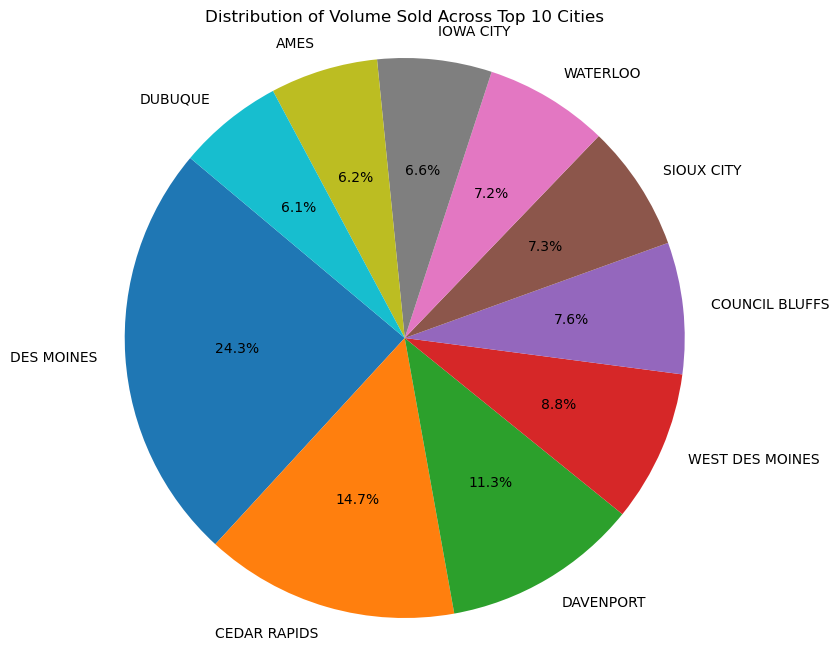

In [58]:
# Calculate total volume sold by city
city_total_volume = df_final_liquor.groupby('city')['volume_sold_liters'].sum().reset_index()

# Sort cities by total volume sold and select top 10
top_10_cities = city_total_volume.sort_values(by='volume_sold_liters', ascending=False).head(10)

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_cities['volume_sold_liters'], labels=top_10_cities['city'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Volume Sold Across Top 10 Cities')
plt.axis('equal') 
plt.show()

Observation:- The pie chart depicts the proportion of liquor sales volume distributed among the top ten cities in Iowa. Des Moines dominates this distribution, contributing 24.3% to the total sales volume, marking it as the primary market. Following are Cedar Rapids and Davenport, which hold 14.7% and 11.3% of the sales volume, respectively, indicating their significant roles in the market. Lesser volumes are observed in West Des Moines and Council Bluffs, making up 8.8% and 7.6% of the volume. The smaller market segments include Ames, Iowa City, and Dubuque, each ranging between 6.1% and 7.2%. This visualization clearly outlines the scale of liquor sales across Iowa’s major cities, highlighting the concentration of sales in specific areas.

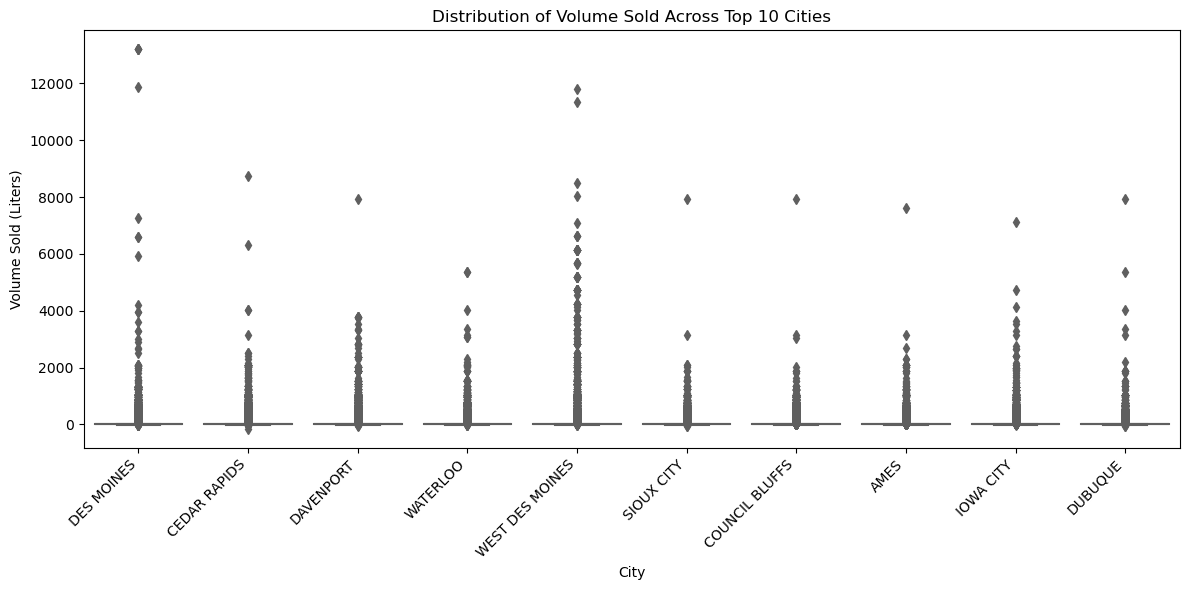

In [59]:
# It provides data for the top 10 cities
top_10_cities = df_final_liquor['city'].value_counts().head(10).index
df_top_10_cities = df_final_liquor[df_final_liquor['city'].isin(top_10_cities)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='volume_sold_liters', data=df_top_10_cities, order=top_10_cities, palette='Set3')

# Set the title and labels
plt.title('Distribution of Volume Sold Across Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Volume Sold (Liters)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

Observation:- The box plot illustrates the variability and median sales volumes of liquor across the top ten cities. Des Moines, Davenport, and Sioux City demonstrate wide variations in sales volumes, suggesting diverse purchasing behaviors or large, irregular transactions. In contrast, cities like West Des Moines, Ames, and Council Bluffs show more consistent sales volumes with compact distributions and fewer extreme values. The median sales in cities such as Ames and Dubuque are relatively low, indicating either smaller markets or fewer large-scale transactions. This chart effectively highlights how liquor sales volumes differ across these cities, providing valuable insights for refining marketing strategies and optimizing inventory distribution based on regional sales characteristics.

## The analysis below focuses on the top 5 entries due to the extensive size of the dataset and to ensure clarity in the visualization.

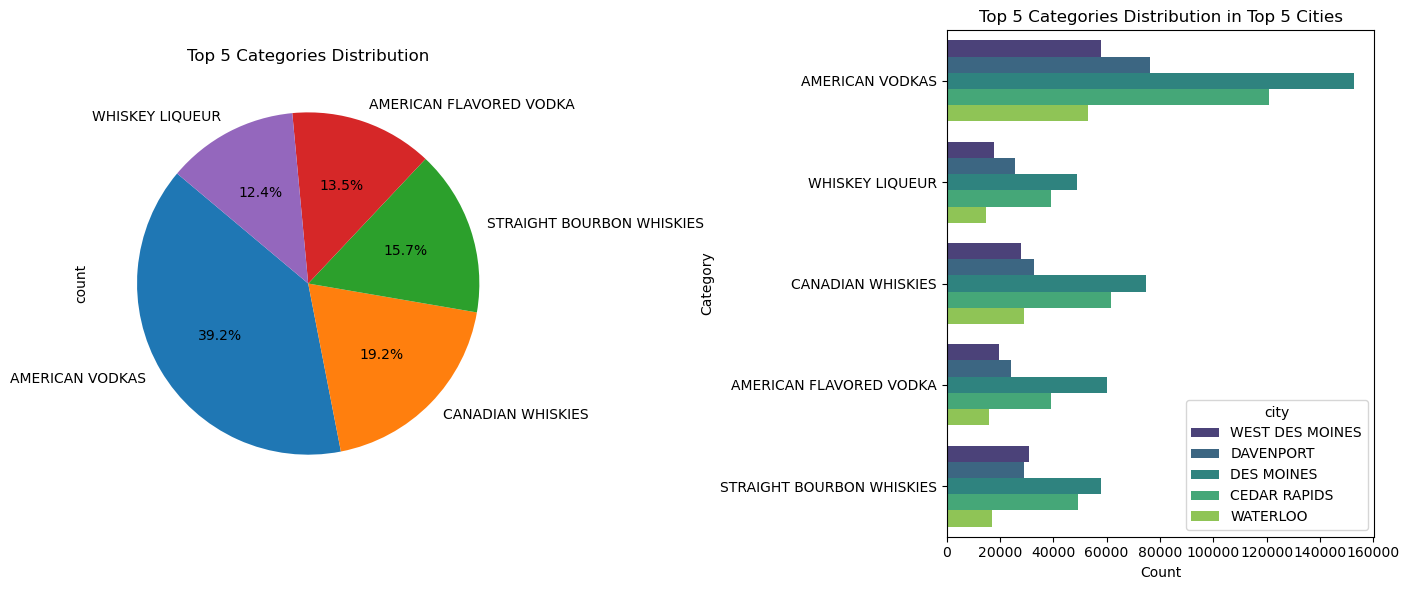

In [60]:
# Get the top 5 cities
top_5_cities = df_final_liquor['city'].value_counts().head(5).index

# Filter the dataframe for the top 5 cities
df_top_5_cities = df_final_liquor[df_final_liquor['city'].isin(top_5_cities)]

# Get the top 5 categories
top_5_categories = df_top_5_cities['category_name'].value_counts().head(5).index

# Filter the dataframe for the top 5 categories
df_top_5_categories = df_top_5_cities[df_top_5_cities['category_name'].isin(top_5_categories)]

# Plotting
plt.figure(figsize=(14, 6))

# Pie chart
plt.subplot(1, 2, 1)
df_top_5_categories['category_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Categories Distribution')

# Bar chart
plt.subplot(1, 2, 2)
sns.countplot(y='category_name', hue='city', data=df_top_5_categories, palette='viridis')
plt.title('Top 5 Categories Distribution in Top 5 Cities')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

Observation:- The provided visualizations depict the distribution of the top five liquor categories across the top five cities based on sales volume. The pie chart shows that American Vodkas constitute the largest share at 39.2%, followed by Canadian Whiskies at 19.2%, indicating a strong preference for these types. Straight Bourbon Whiskies, American Flavored Vodka, and Whiskey Liqueur also hold significant portions, at 15.7%, 13.5%, and 12.4% respectively.

The bar chart below offers a detailed city-wise breakdown, showing variations in preference across these cities. American Vodkas dominate in most cities, particularly in Des Moines and West Des Moines, while other cities like Cedar Rapids show a more balanced distribution among categories. This comprehensive analysis highlights distinct consumer preferences and market strengths in different urban centers, useful for targeted marketing and stock planning in these regions.

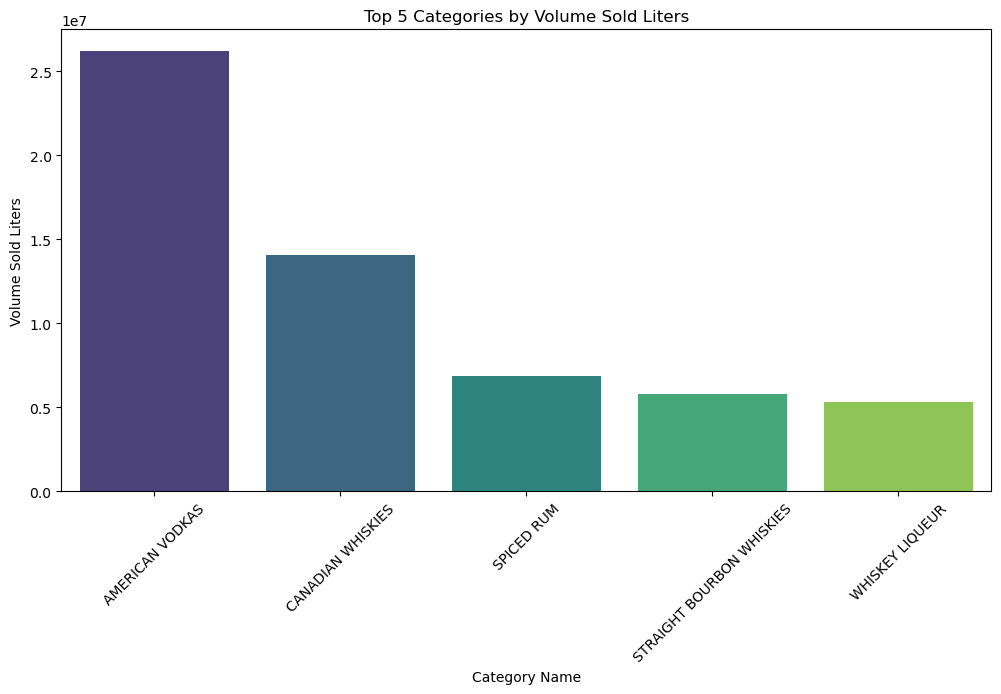

In [61]:
# Group the data by 'category_name' and sum 'volume_sold_liters', then get the top 5 categories
top_categories_volume = df_final_liquor.groupby('category_name')['volume_sold_liters'].sum().nlargest(5)

# Convert the Series to DataFrame for easier plotting
top_categories_volume = top_categories_volume.reset_index()

# Create a bar plot for the top 5 categories by volume sold
plt.figure(figsize=(12, 6))
sns.barplot(x='category_name', y='volume_sold_liters', data=top_categories_volume, palette='viridis')

# Set the title and labels
plt.title('Top 5 Categories by Volume Sold Liters')
plt.xlabel('Category Name')
plt.ylabel('Volume Sold Liters')
plt.xticks(rotation=45) 

# Show the plot
plt.show()

Observation;- The bar chart displays sales volumes for the top five liquor categories, showcasing varying levels of consumer demand. American Vodkas dominate the chart, indicating their popularity and leading position in the market, followed by Canadian Whiskies, which also enjoy significant sales. The subsequent categories—Spiced Rum, Straight Bourbon Whiskies, and Whiskey Liqueur—each represent a smaller portion of the market compared to the top two. This dominance of American Vodkas highlights a clear consumer preference for this type. The chart uses a gradient color scheme to visually distinguish between the categories effectively. Overall, this visualization clearly outlines which liquor categories are most favored, providing insights into consumer preferences and market dynamics.